In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mno
import seaborn as sns

In [2]:
data = pd.read_csv('covid_19_clean_complete.csv')
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [4]:
data.isnull().values.any()

True

In [5]:
data.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [6]:
data.shape

(49068, 10)

In [7]:
for i in range(0, len(data)-1):
    if (pd.notna(data['Province/State'][i])):
        data['Country/Region'][i]=data['Country/Region'][i]+''+data['Province/State'][i]

C:\Users\omarf\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
data = data.drop(columns= ['Province/State'])

In [9]:
data = data.drop(columns= ['WHO Region'])

In [10]:
data.shape

(49068, 8)

In [11]:
col_list = [c for c in data.columns if data[c].dtype == 'object']
col_list

['Country/Region', 'Date']

In [12]:
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].apply(datetime.toordinal)

In [13]:
data.head(100)

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,33.939110,67.709953,737446,0,0,0,0
1,Albania,41.153300,20.168300,737446,0,0,0,0
2,Algeria,28.033900,1.659600,737446,0,0,0,0
3,Andorra,42.506300,1.521800,737446,0,0,0,0
4,Angola,-11.202700,17.873900,737446,0,0,0,0
...,...,...,...,...,...,...,...,...
95,Ecuador,-1.831200,-78.183400,737446,0,0,0,0
96,Egypt,26.820553,30.802498,737446,0,0,0,0
97,El Salvador,13.794200,-88.896500,737446,0,0,0,0
98,Equatorial Guinea,1.650800,10.267900,737446,0,0,0,0


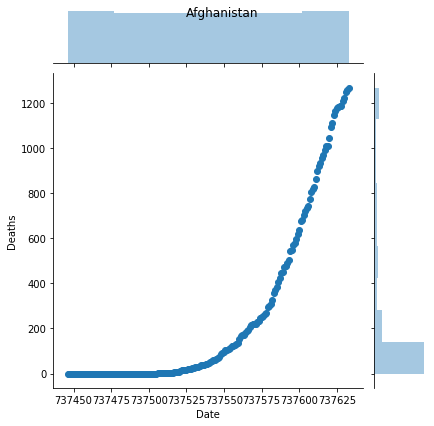

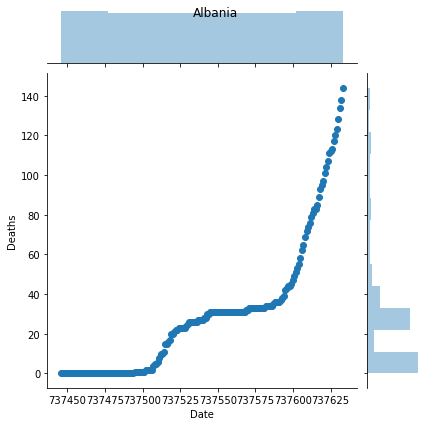

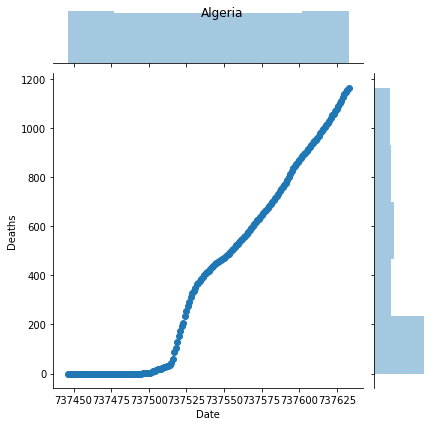

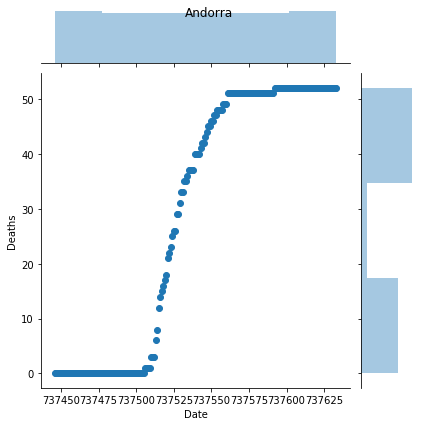

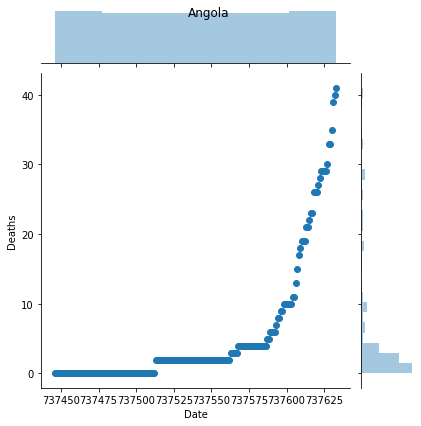

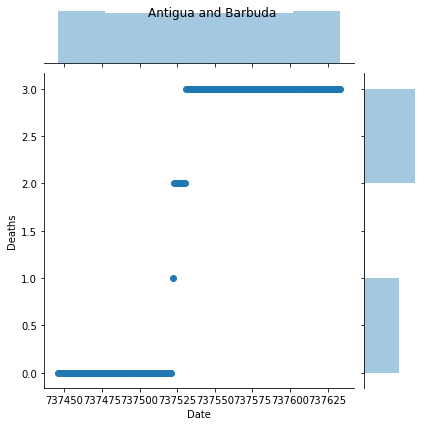

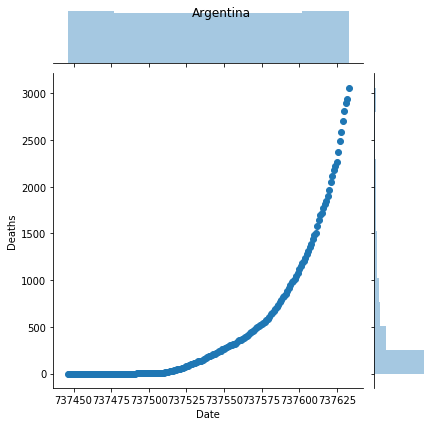

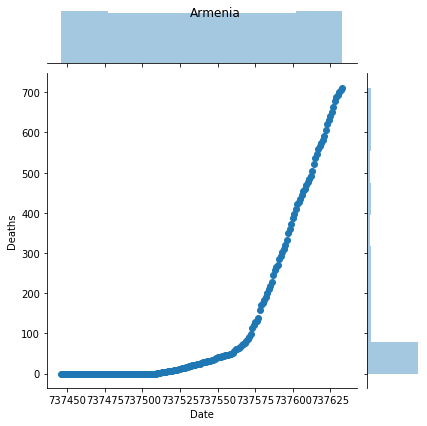

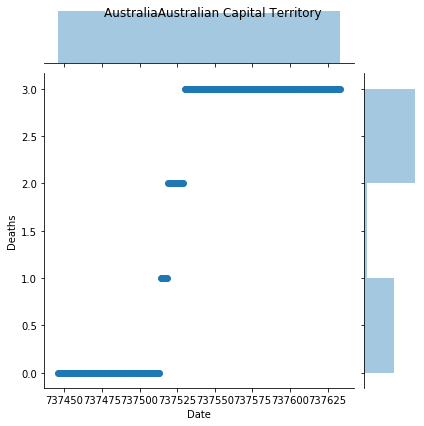

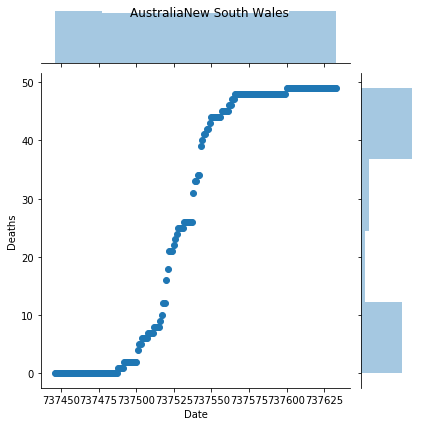

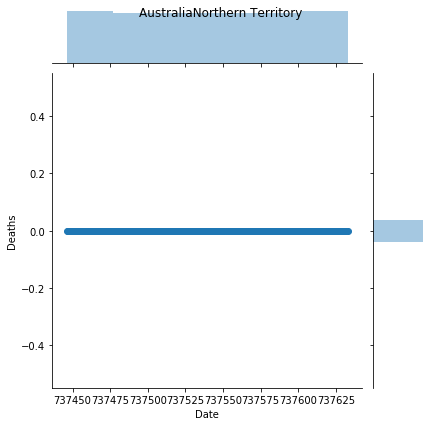

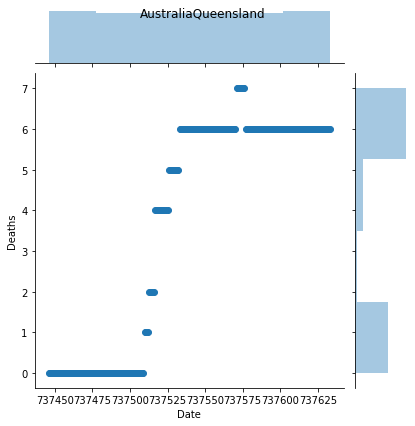

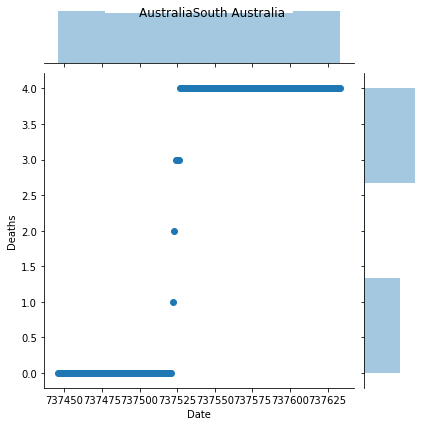

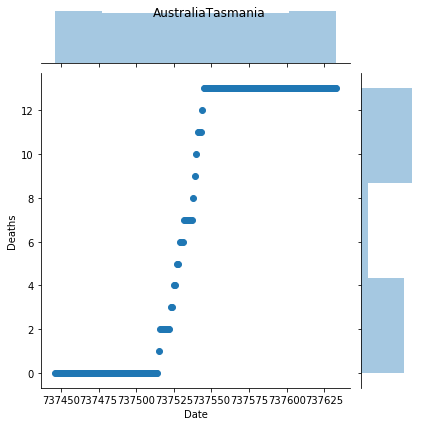

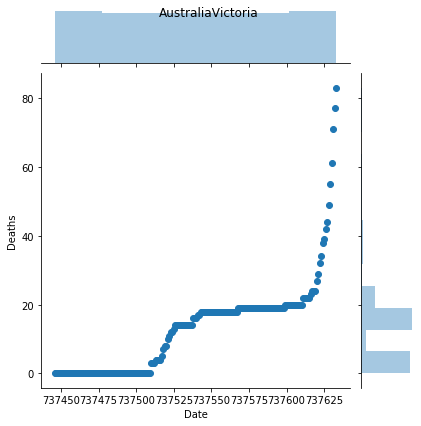

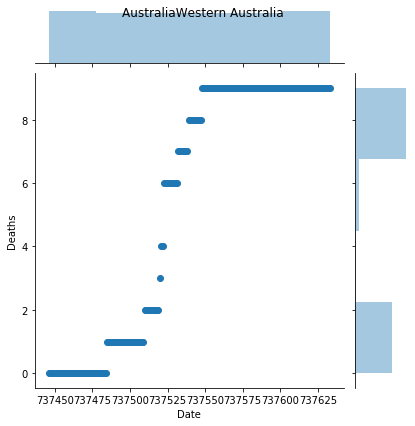

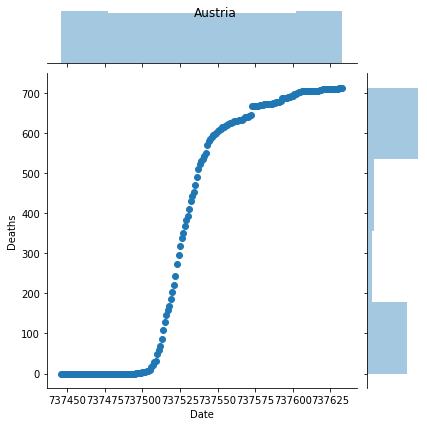

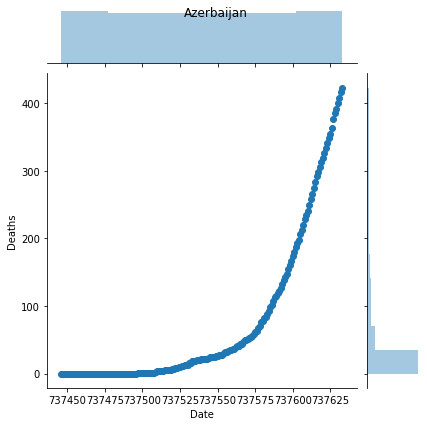

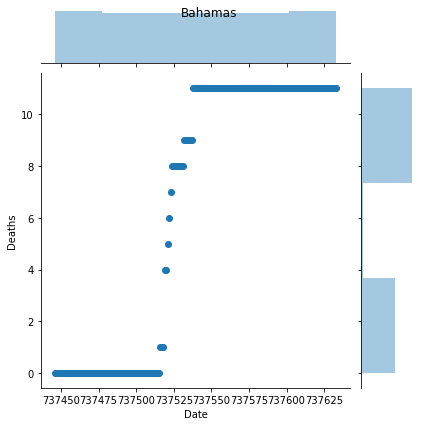

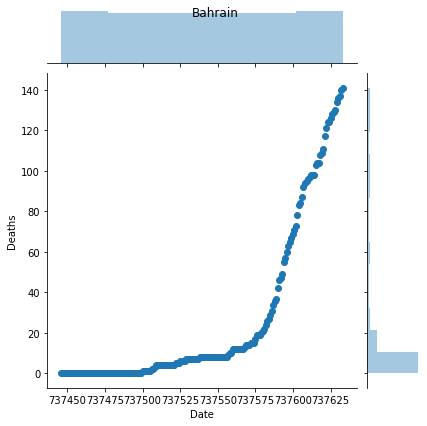

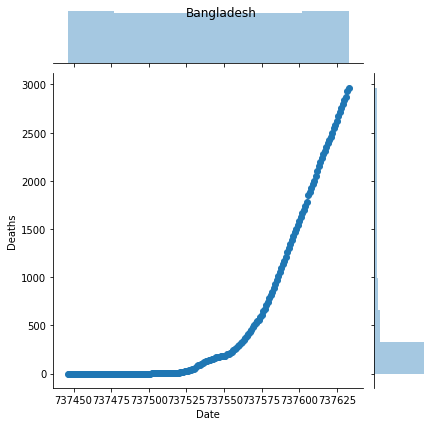

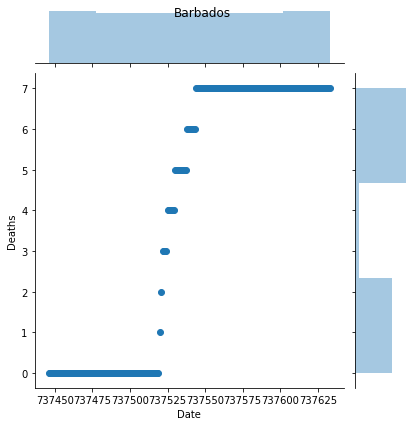

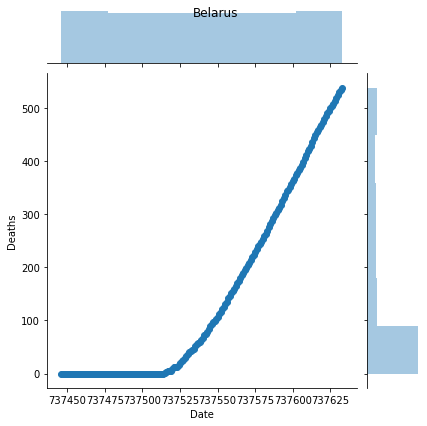

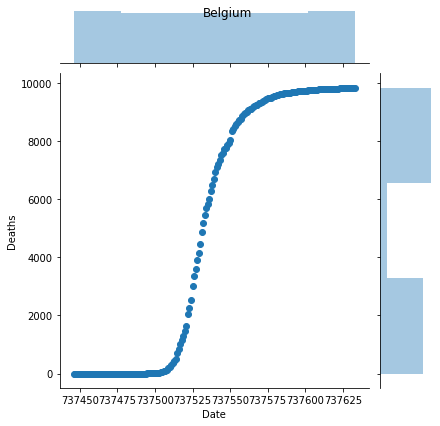

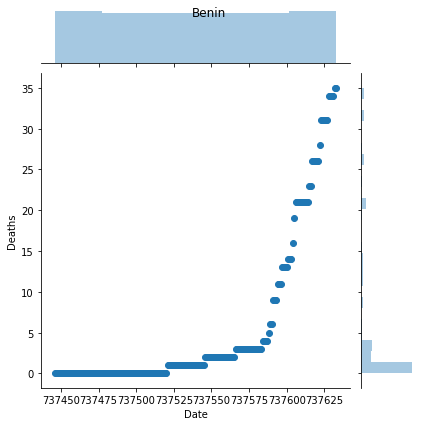

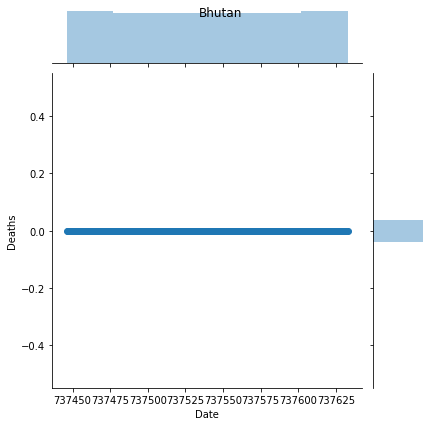

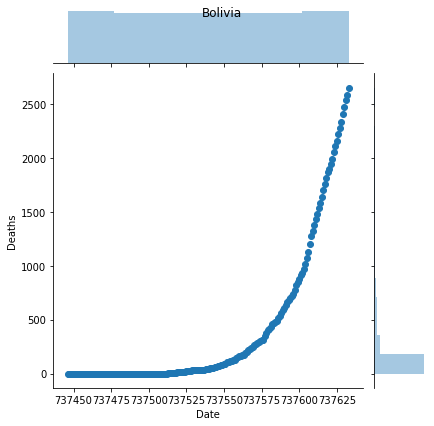

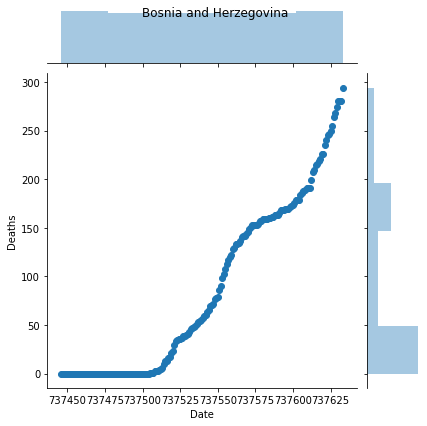

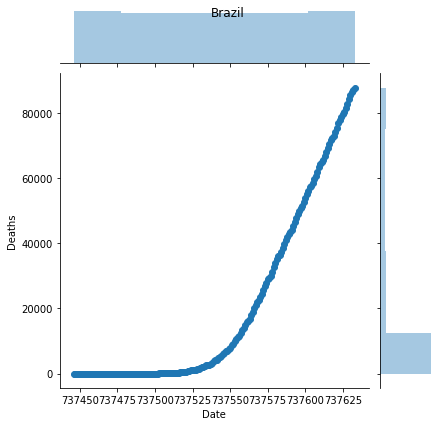

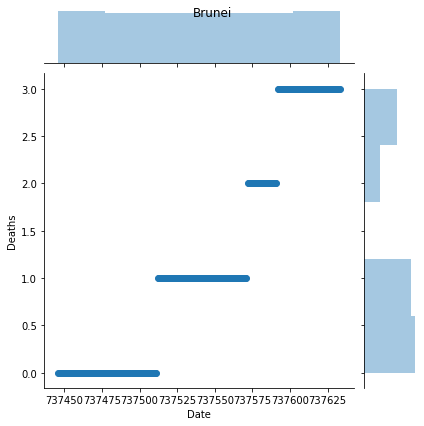

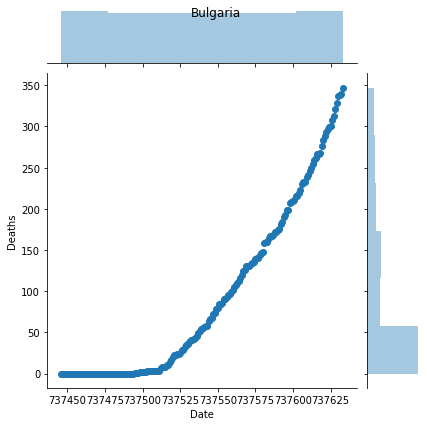

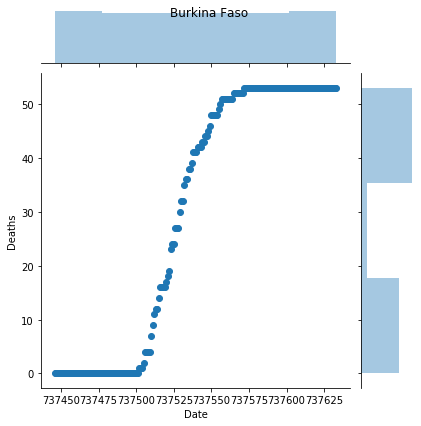

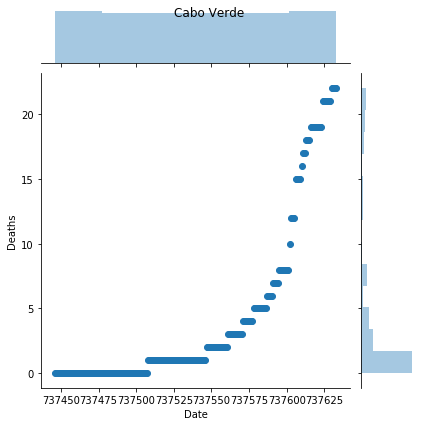

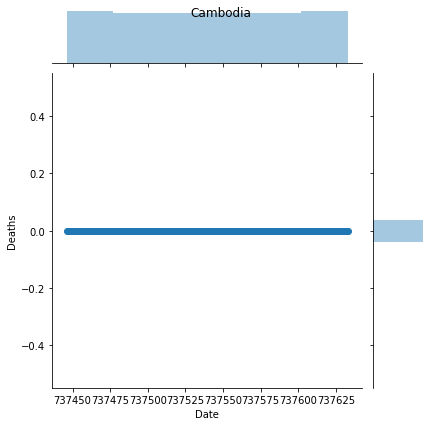

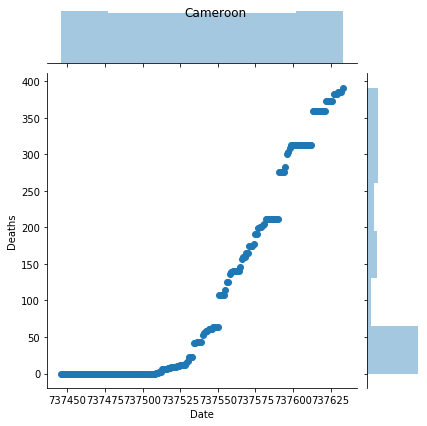

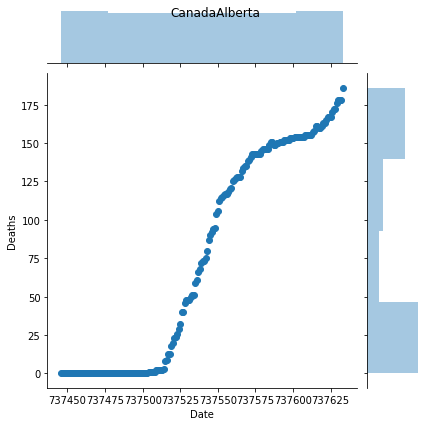

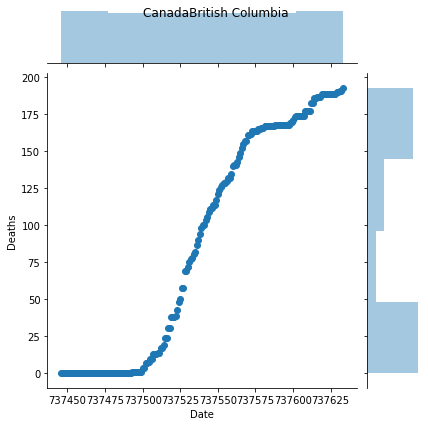

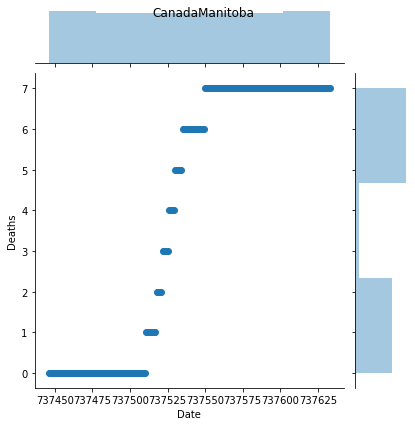

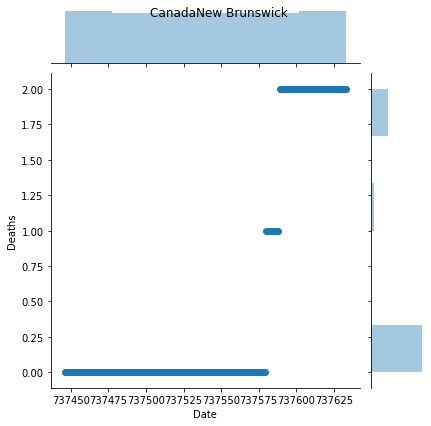

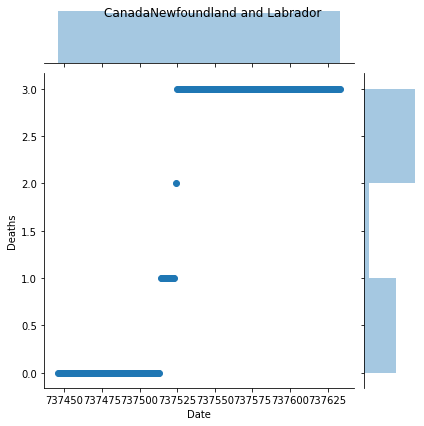

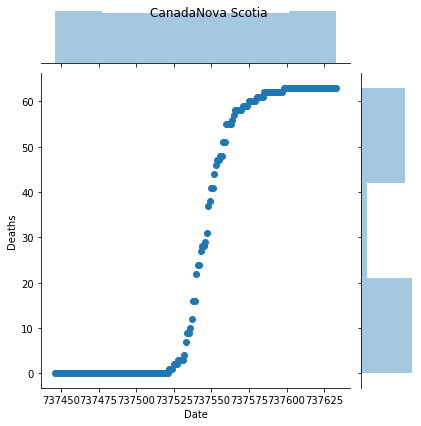

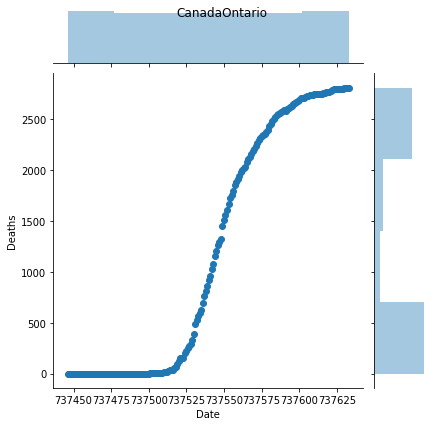

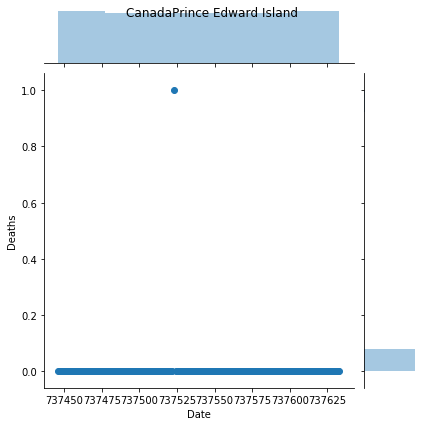

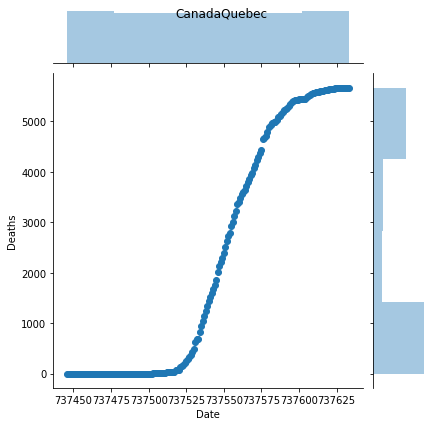

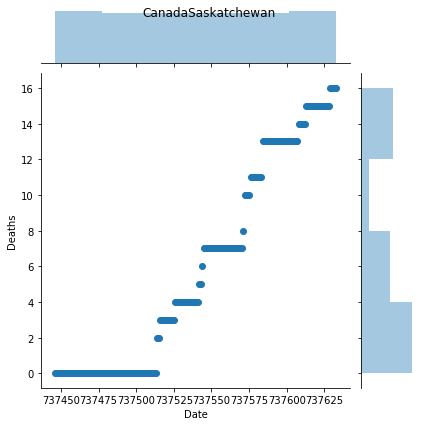

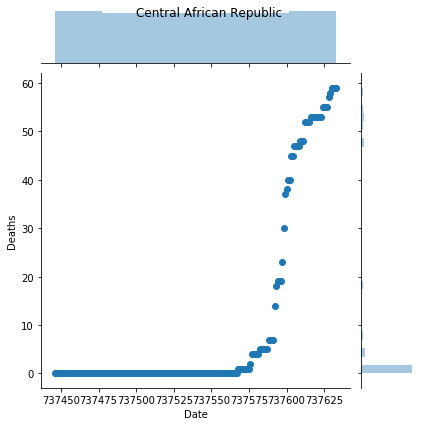

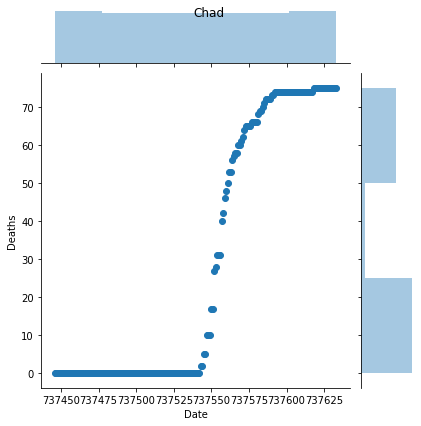

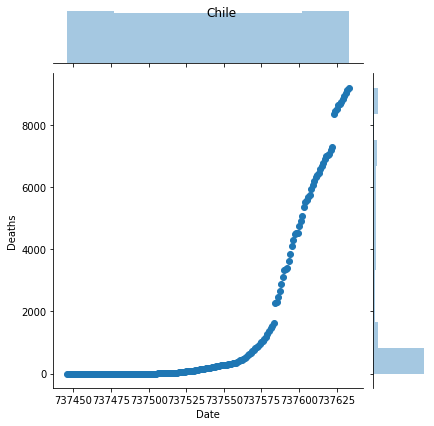

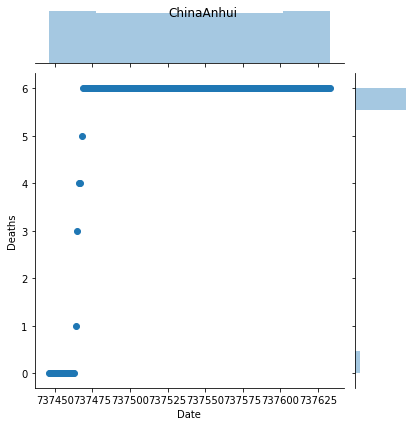

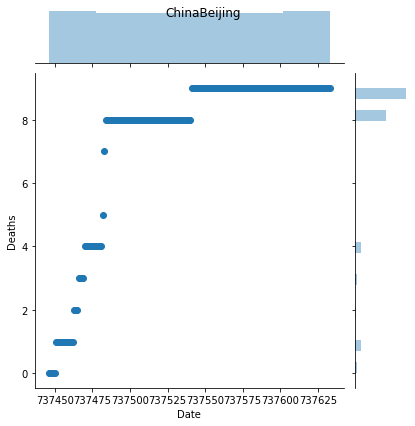

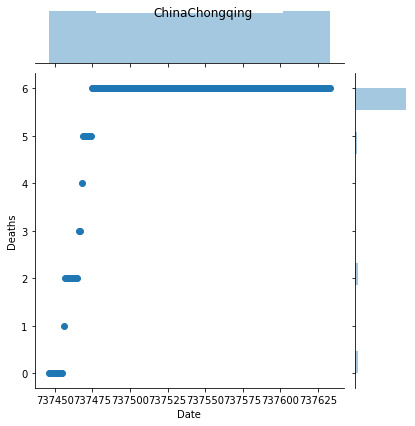

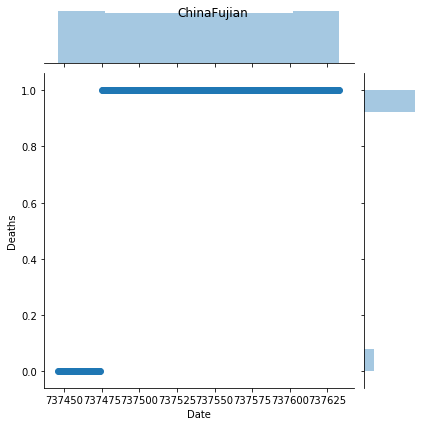

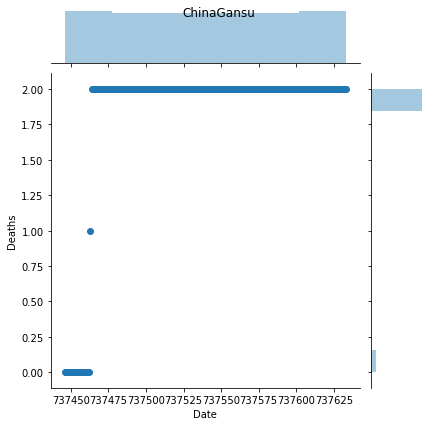

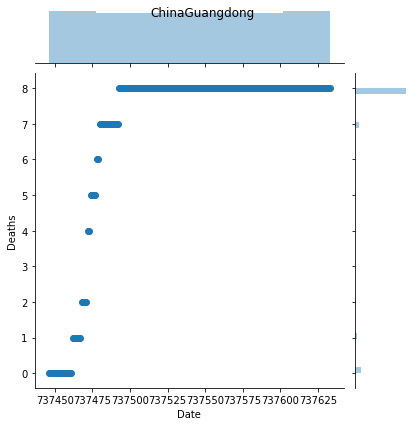

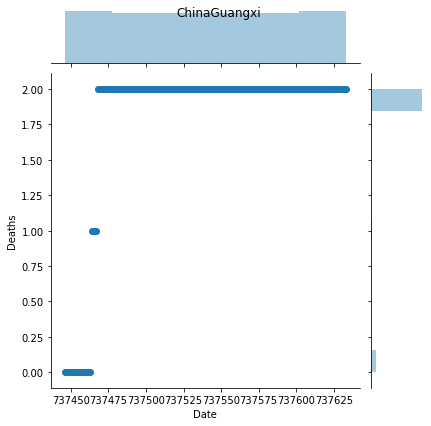

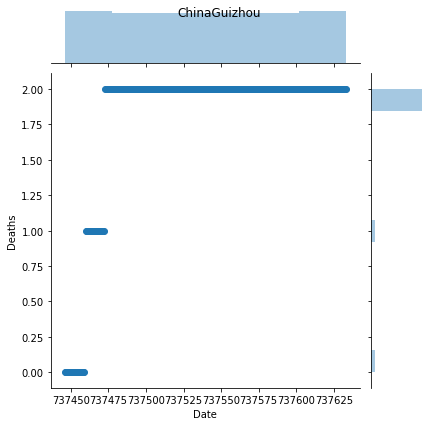

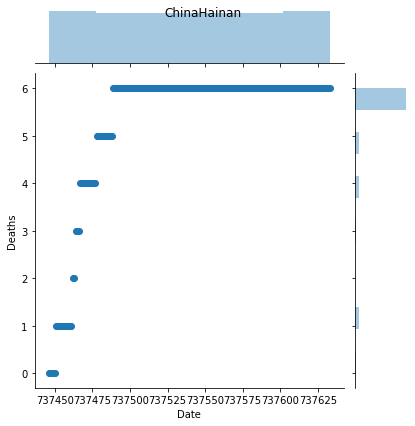

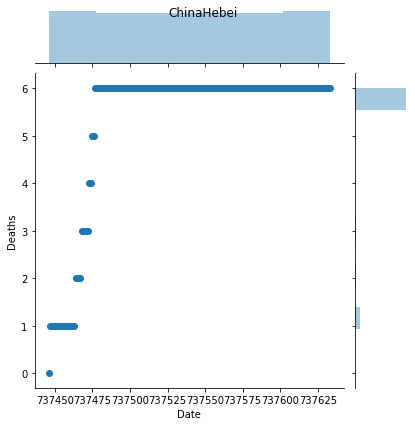

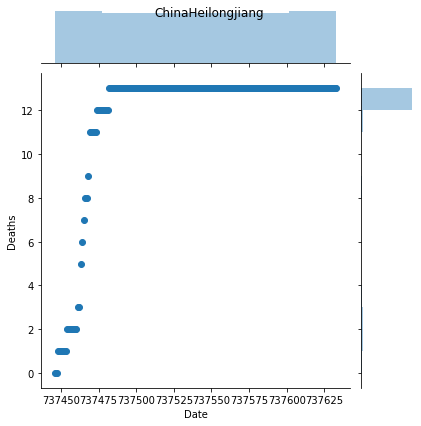

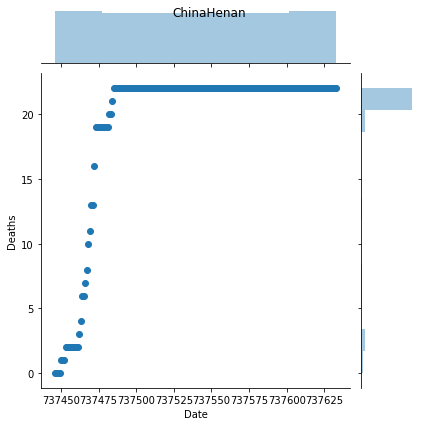

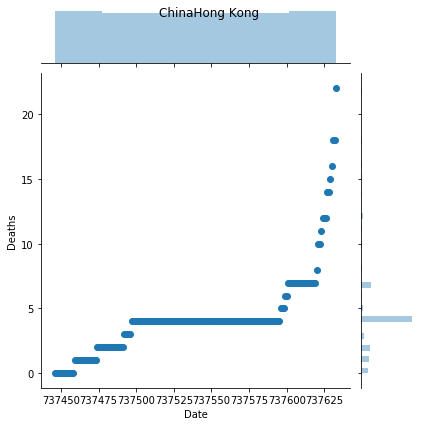

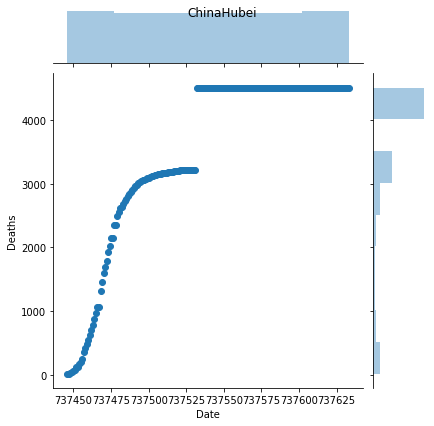

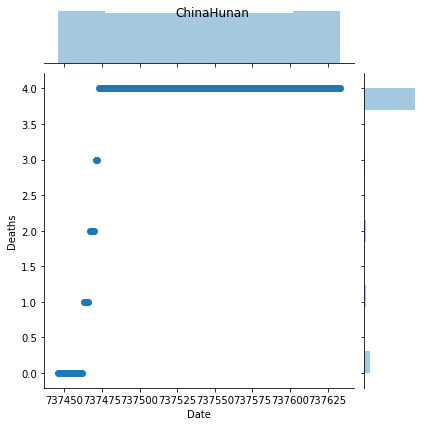

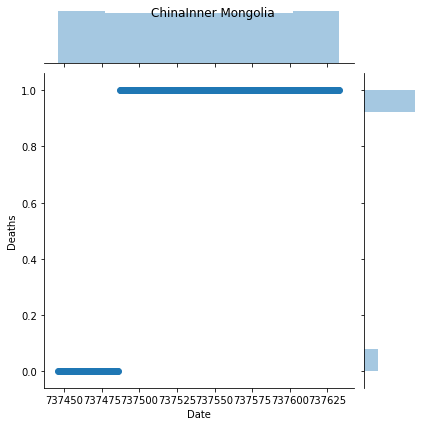

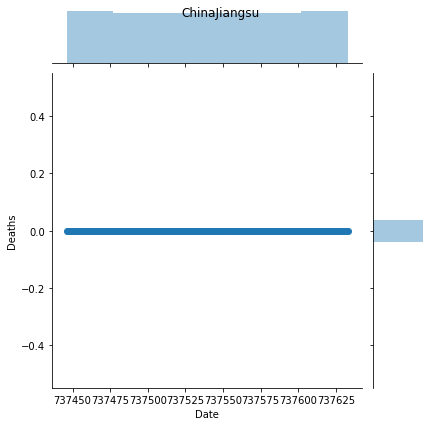

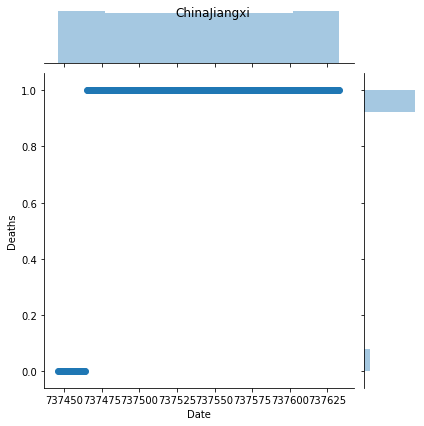

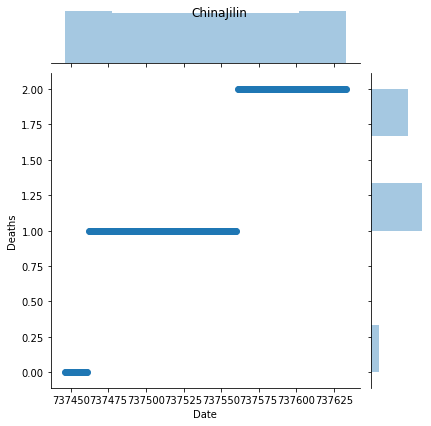

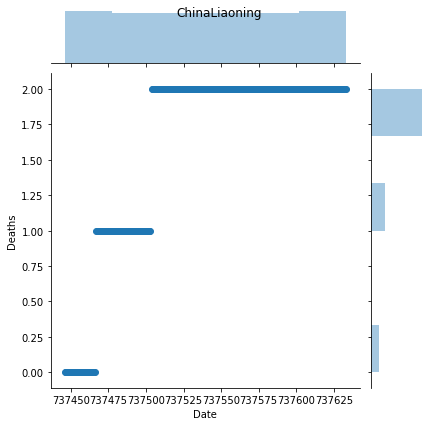

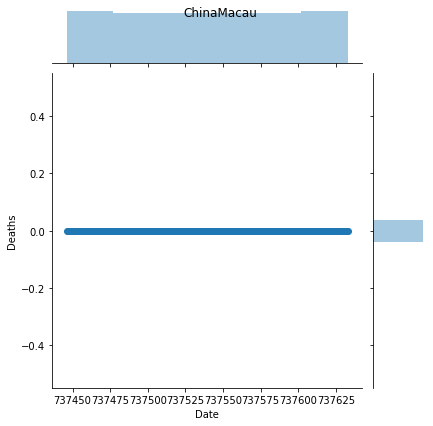

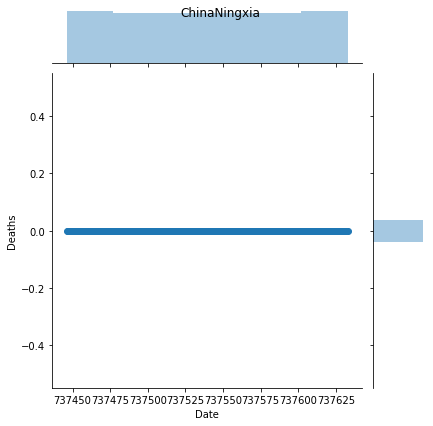

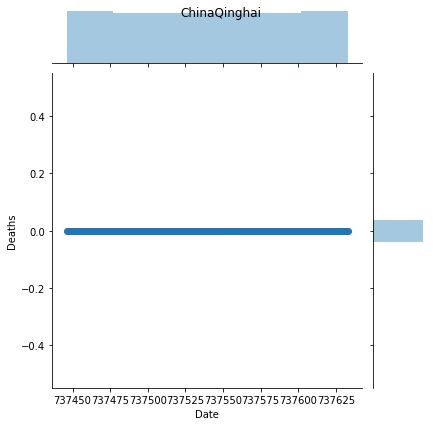

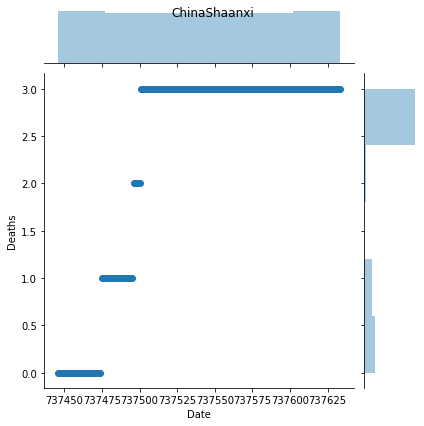

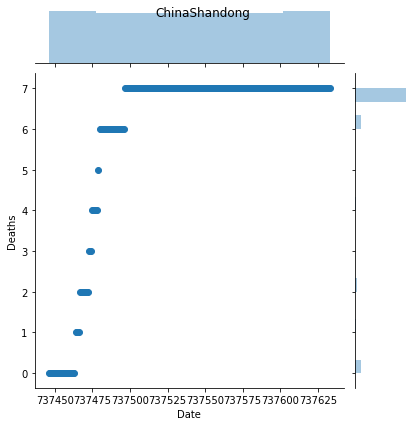

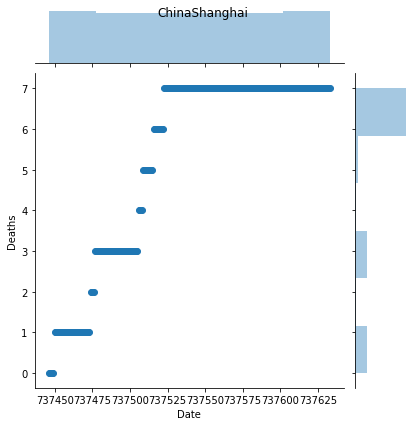

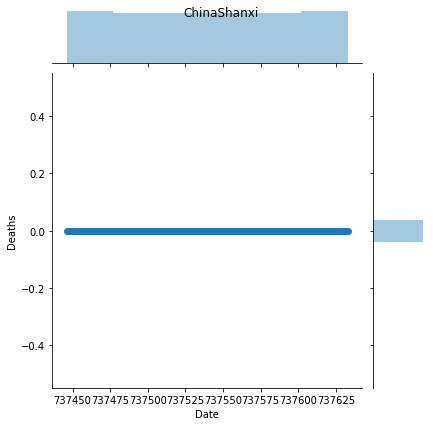

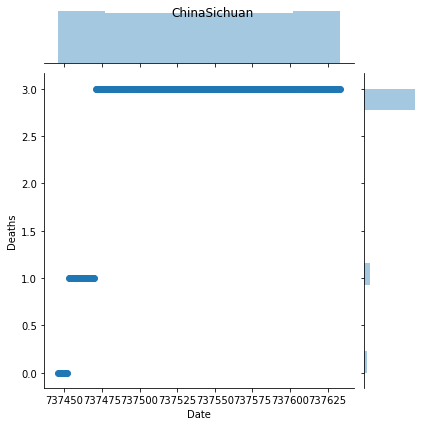

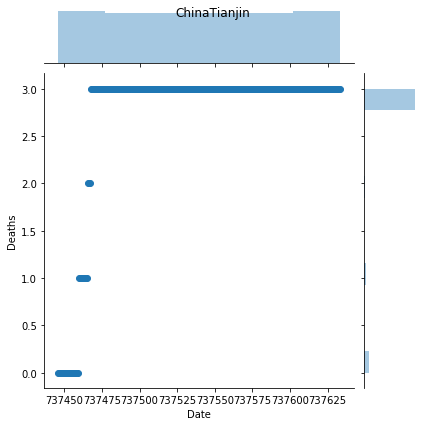

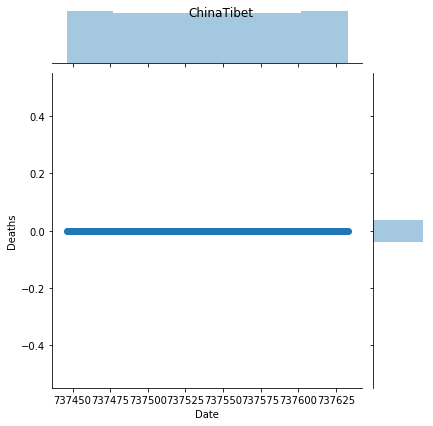

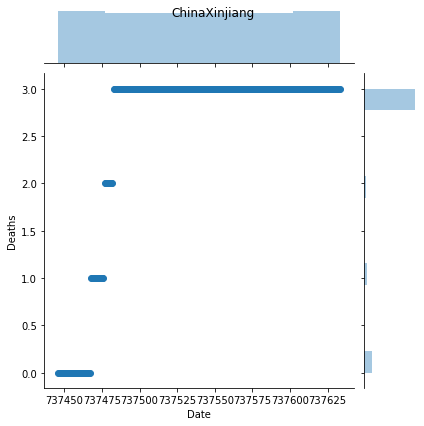

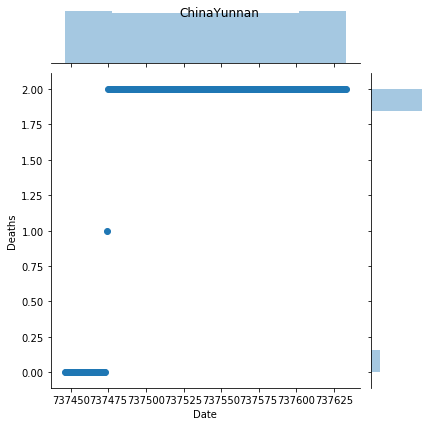

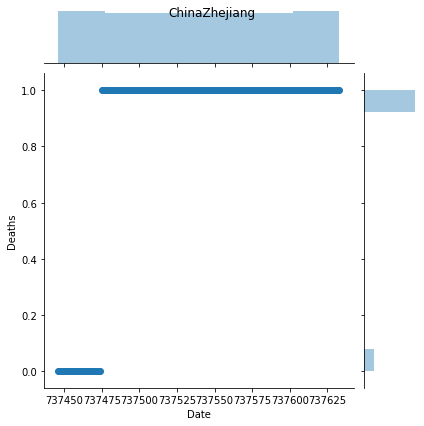

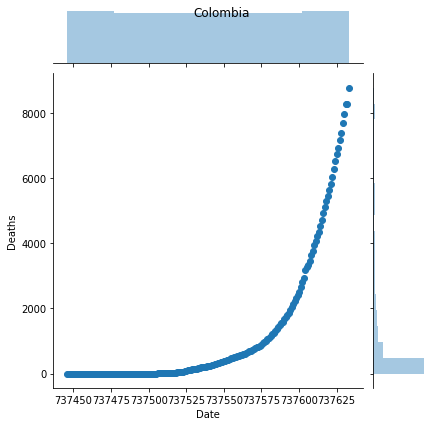

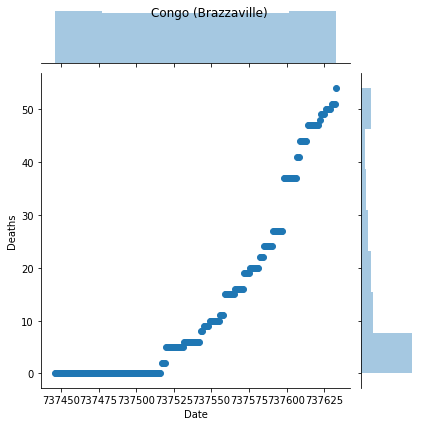

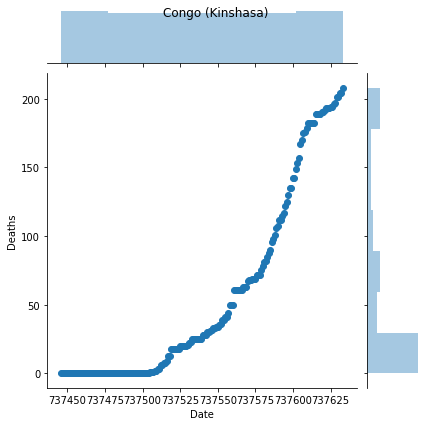

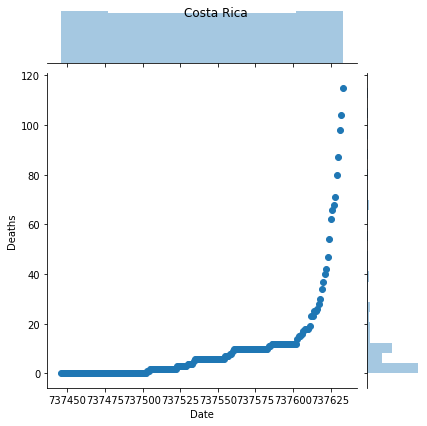

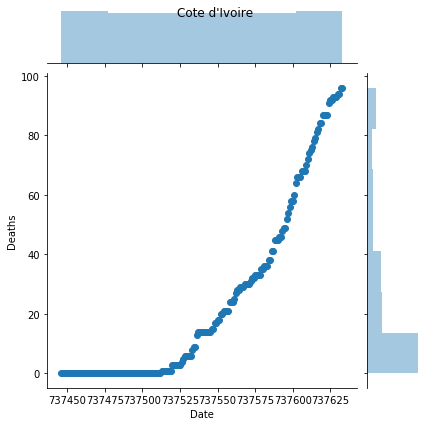

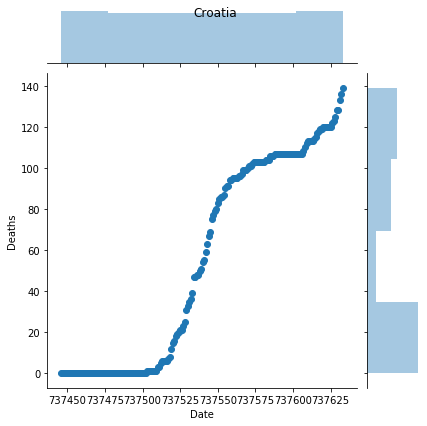

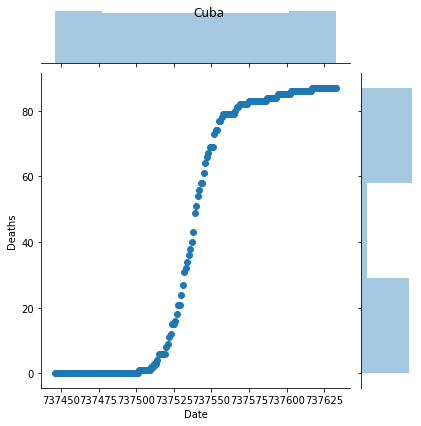

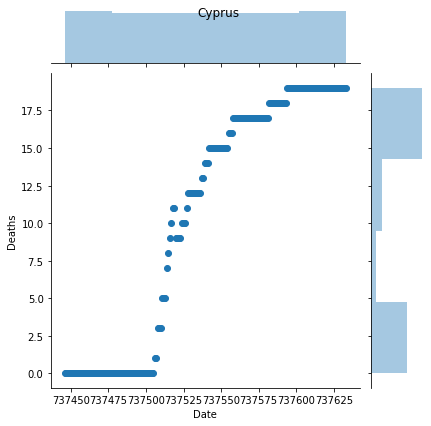

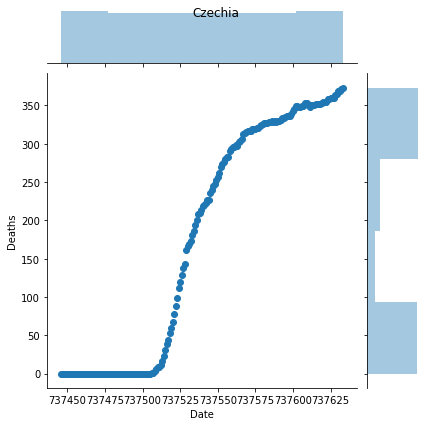

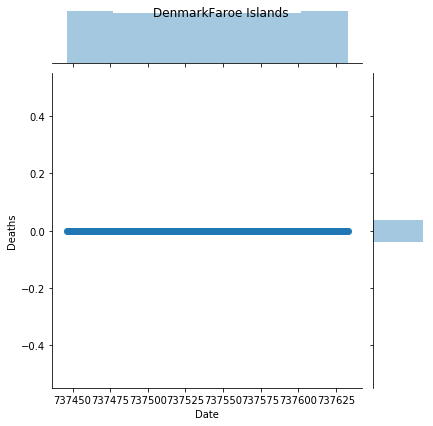

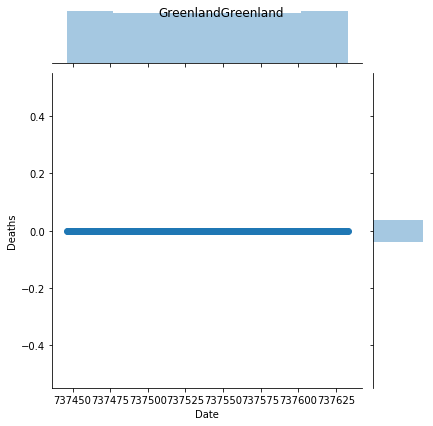

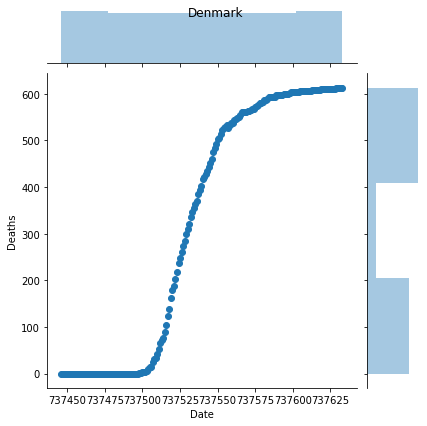

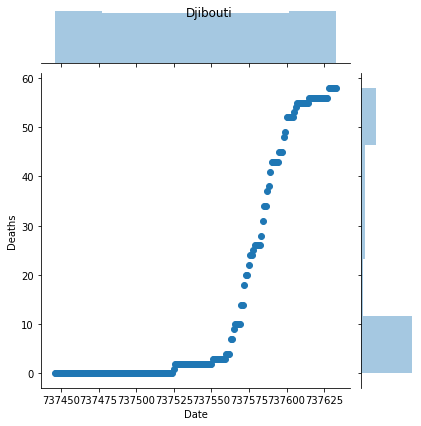

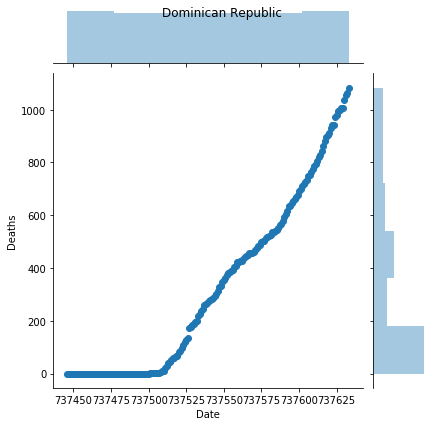

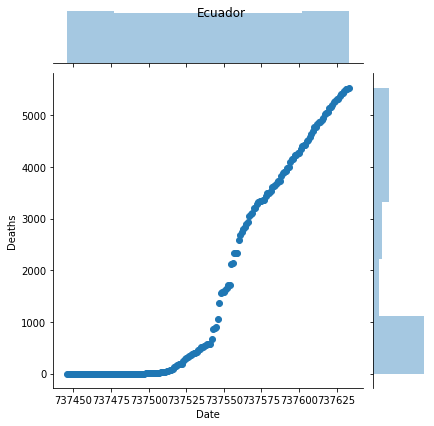

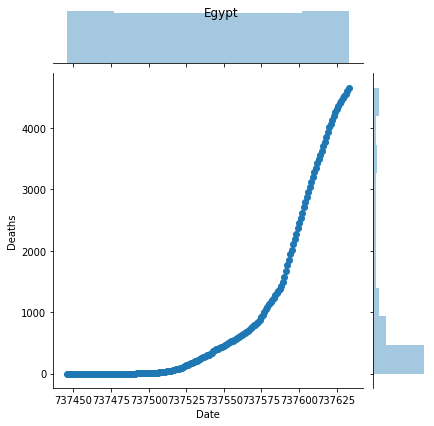

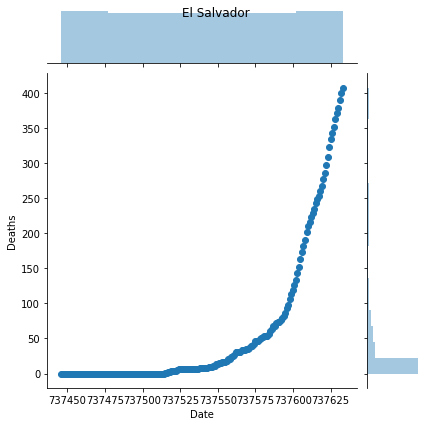

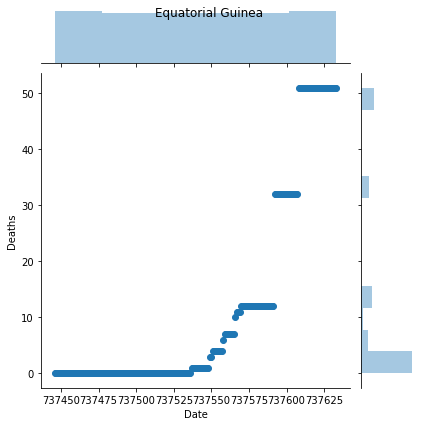

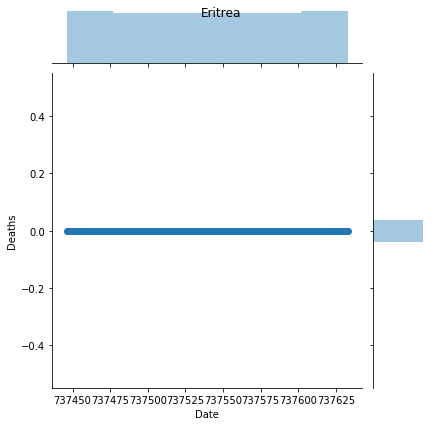

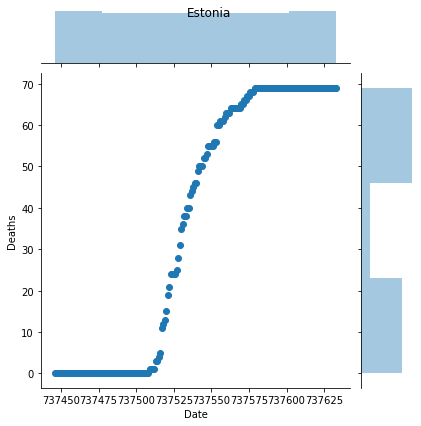

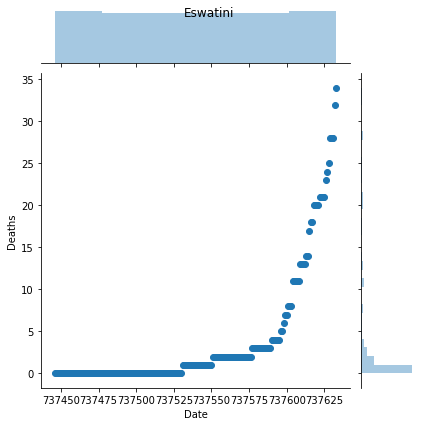

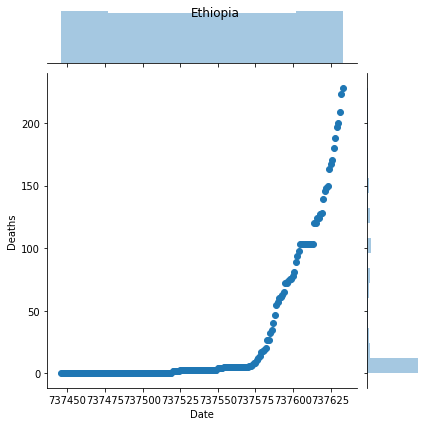

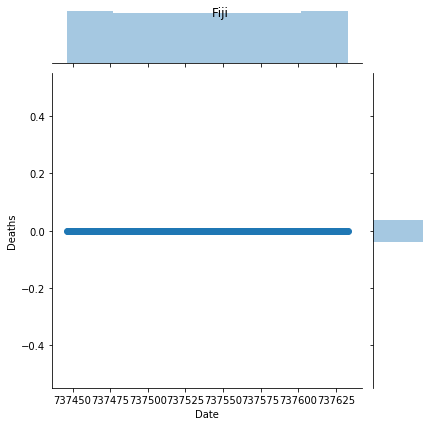

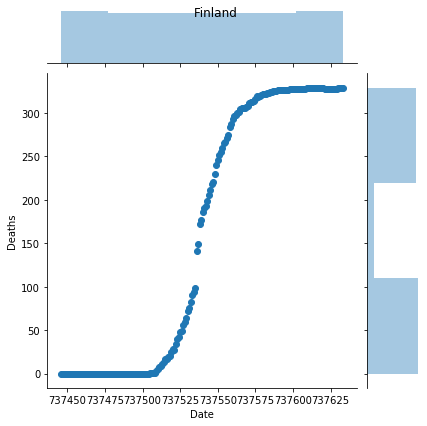

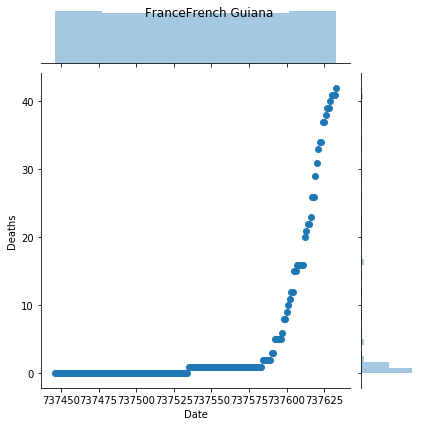

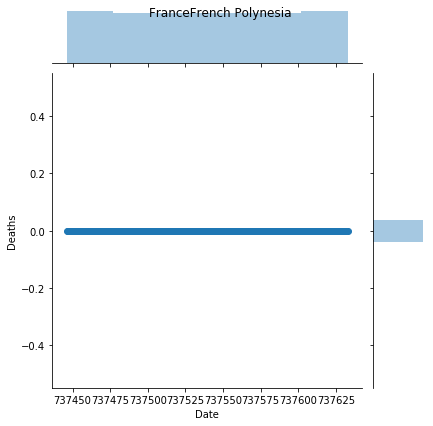

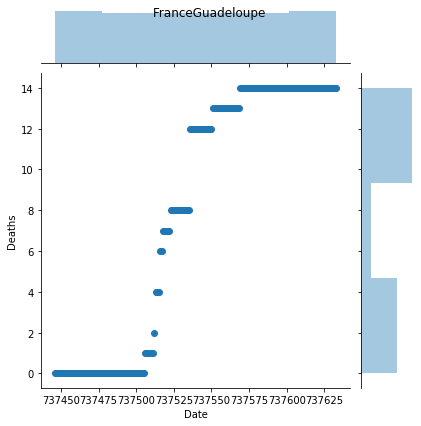

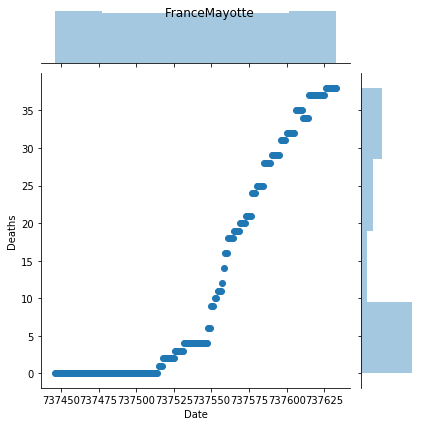

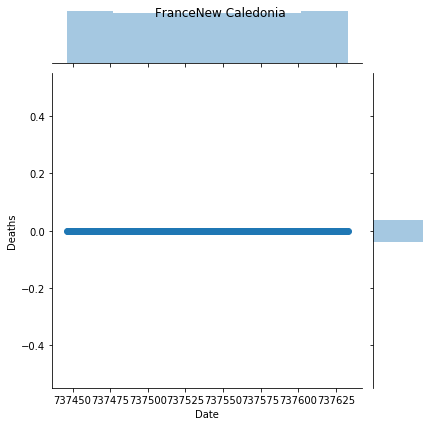

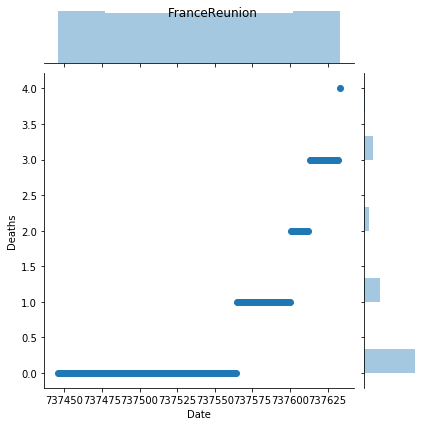

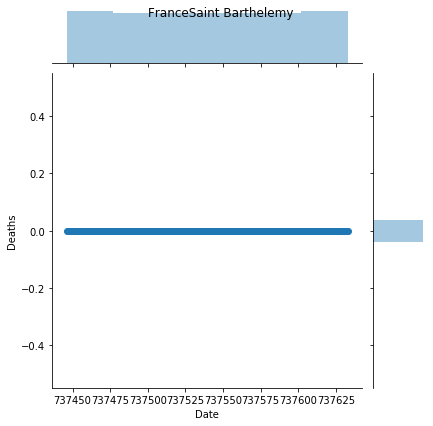

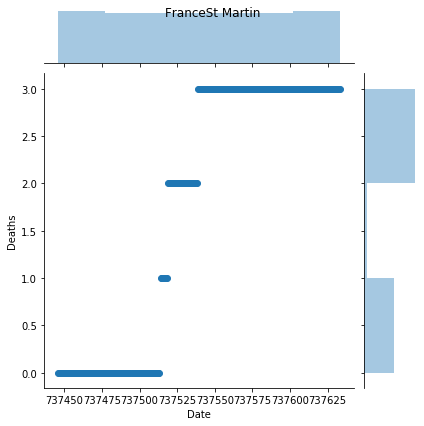

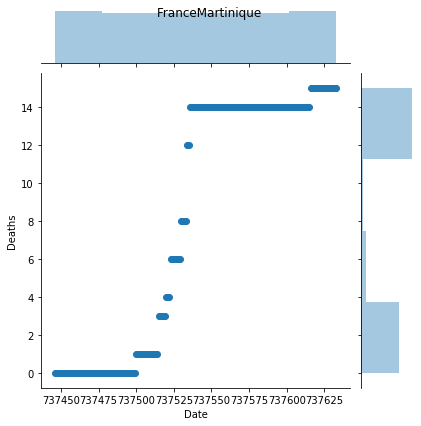

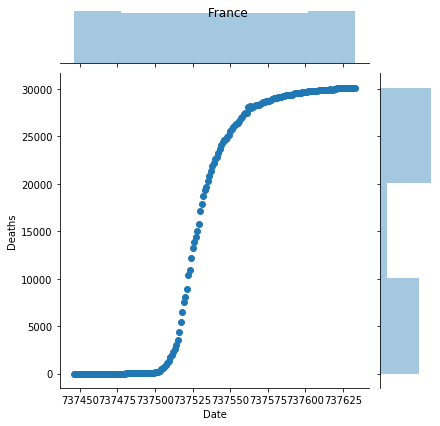

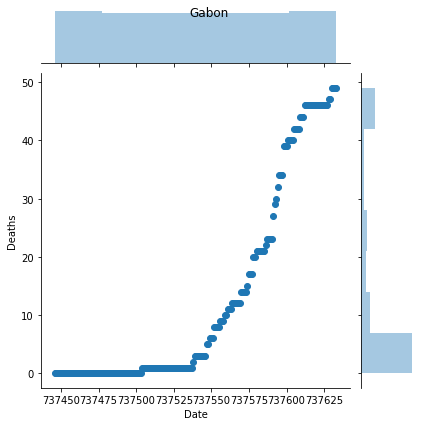

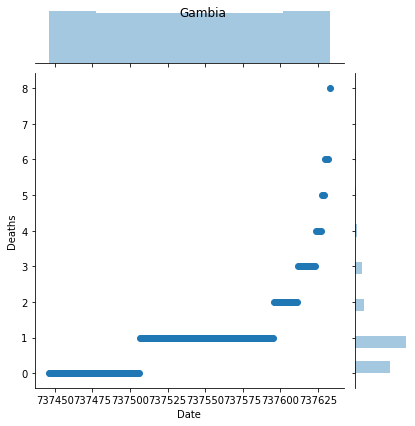

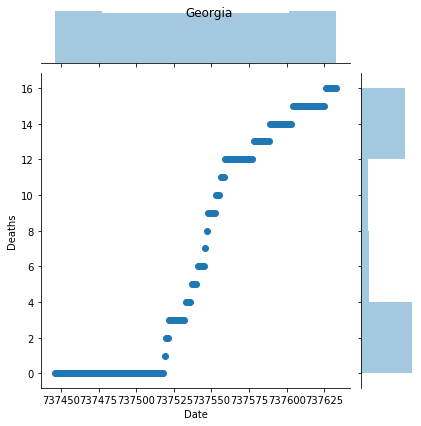

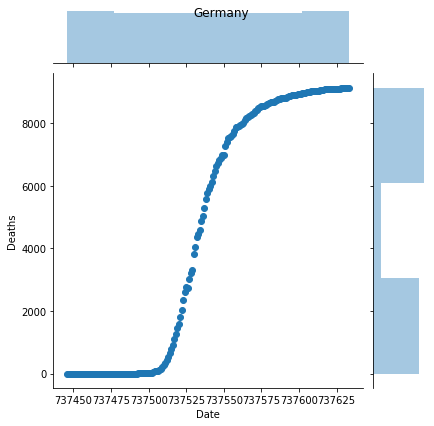

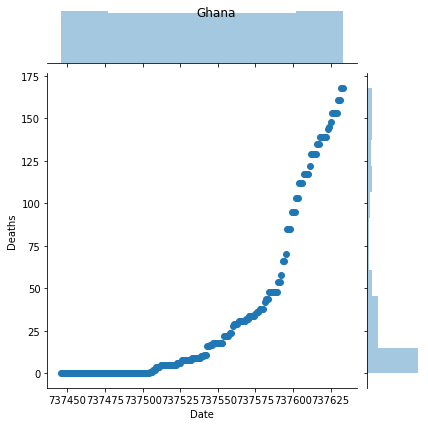

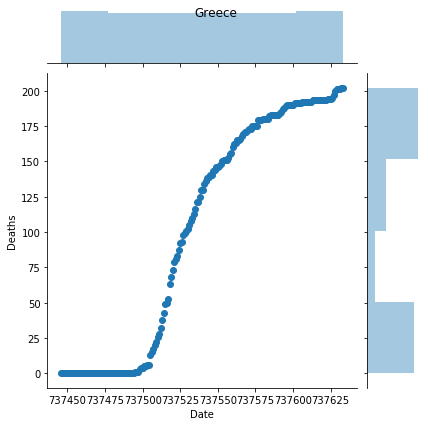

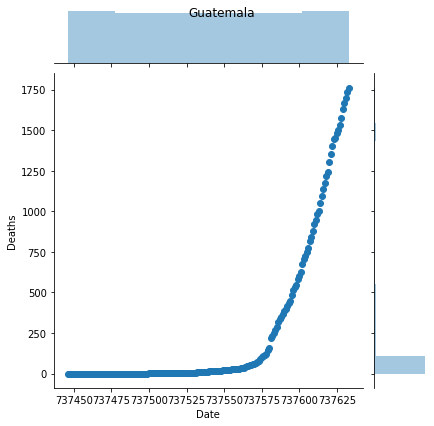

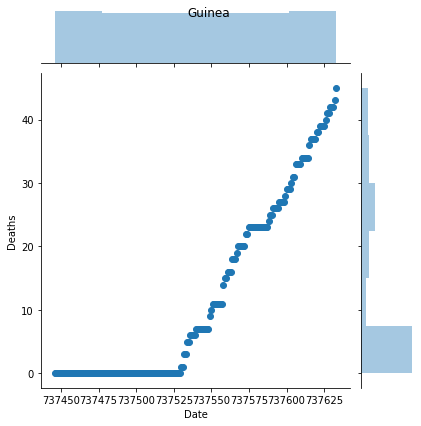

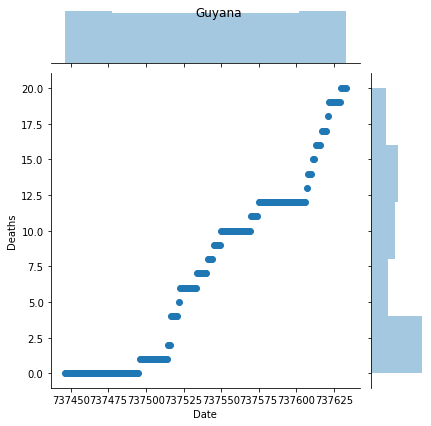

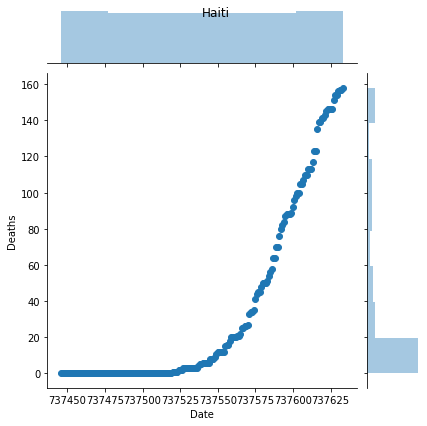

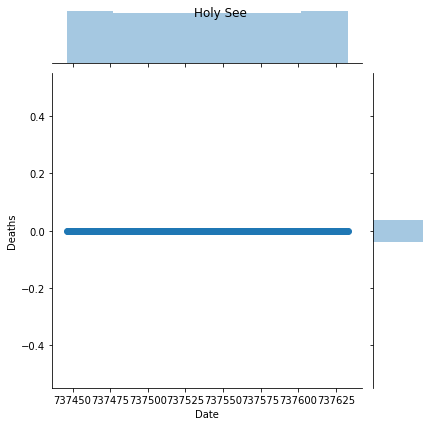

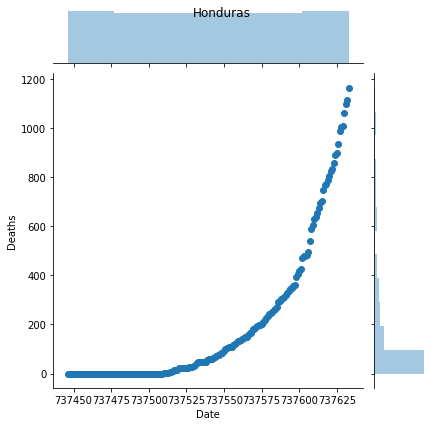

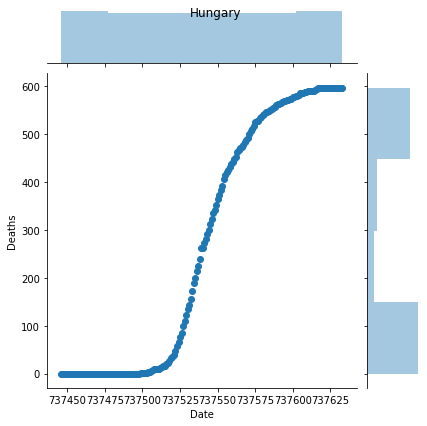

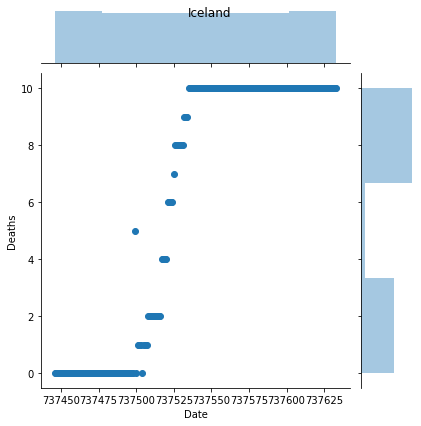

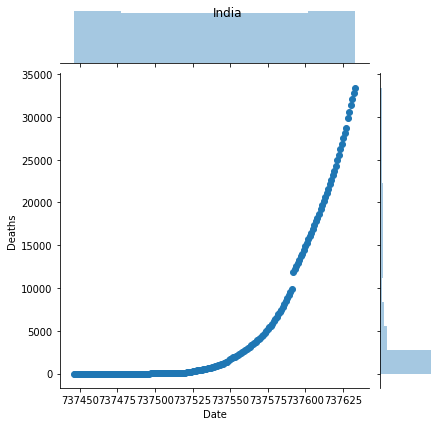

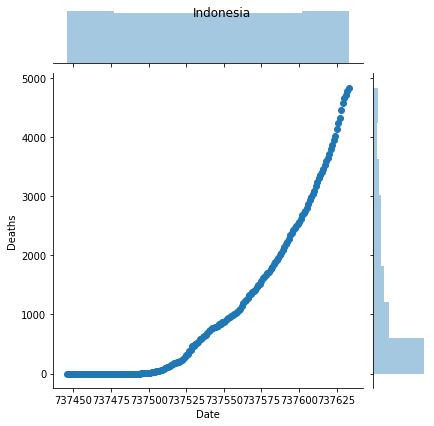

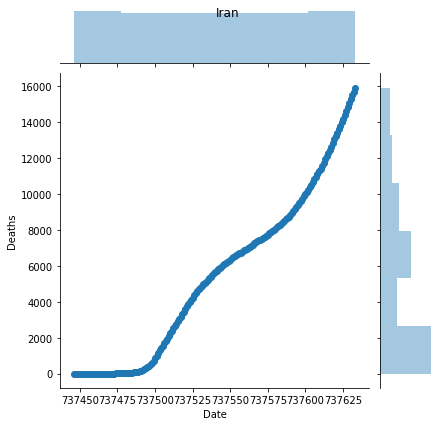

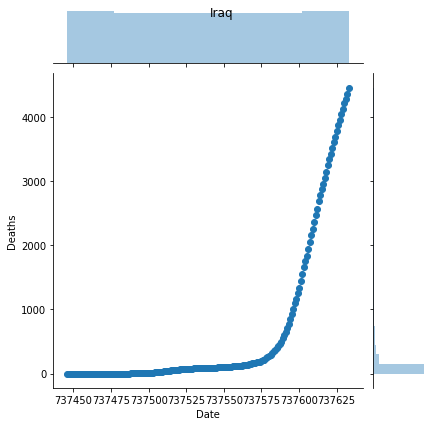

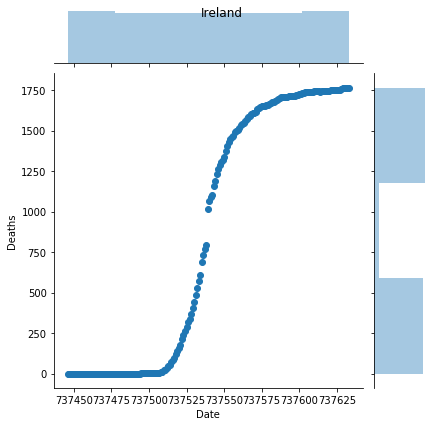

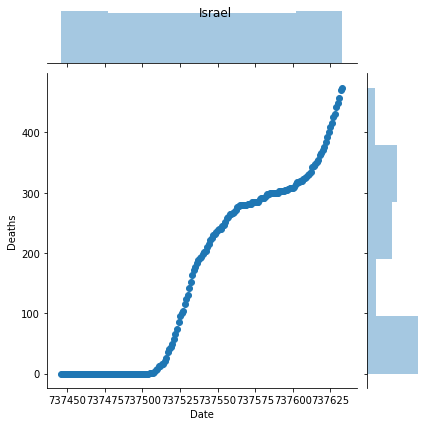

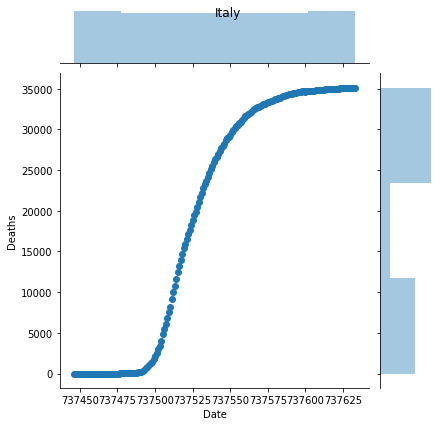

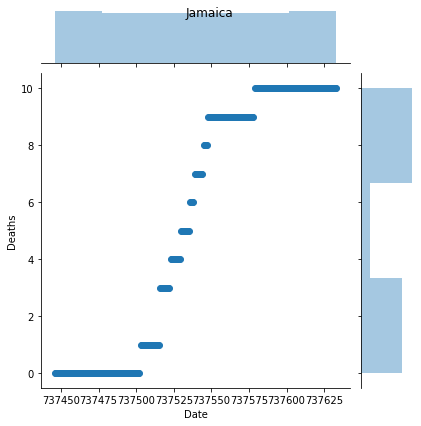

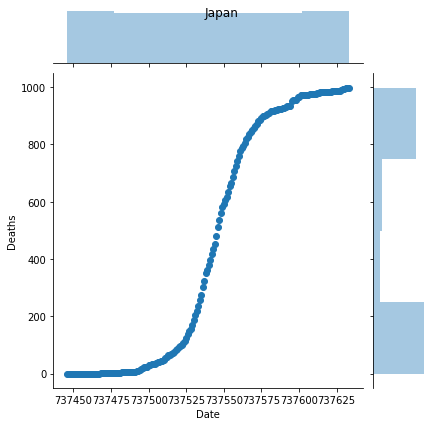

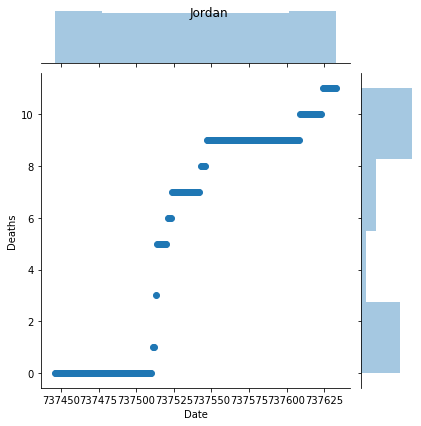

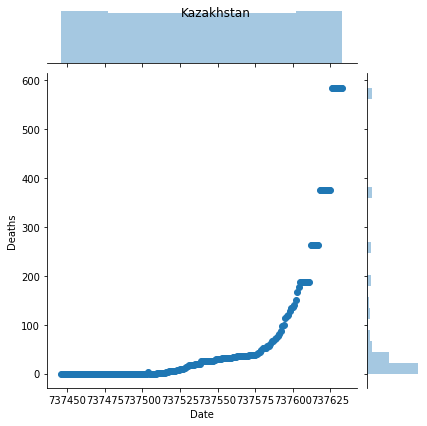

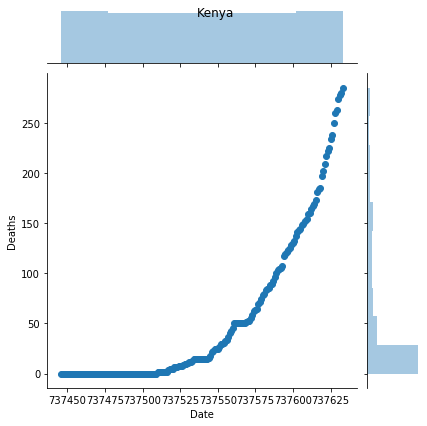

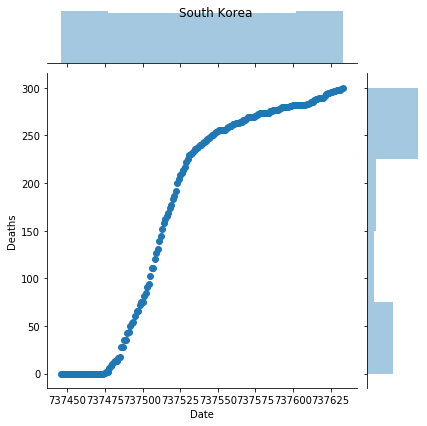

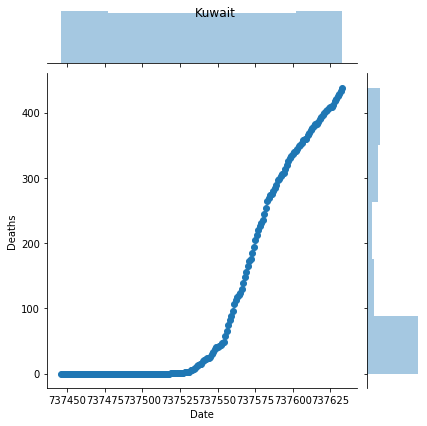

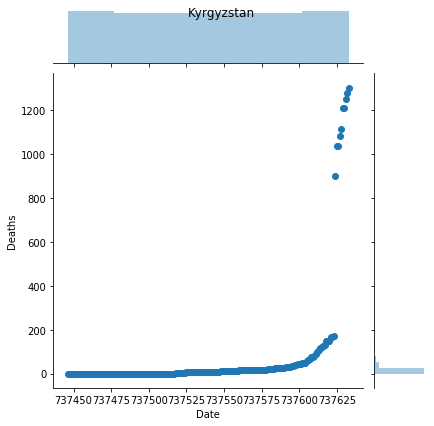

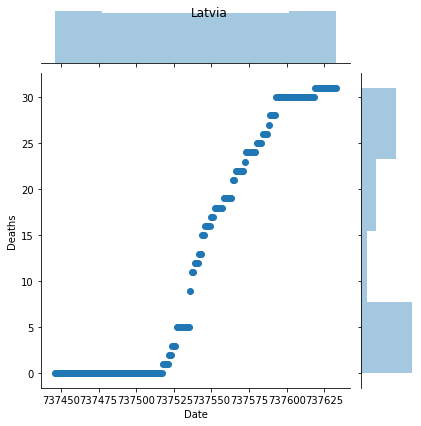

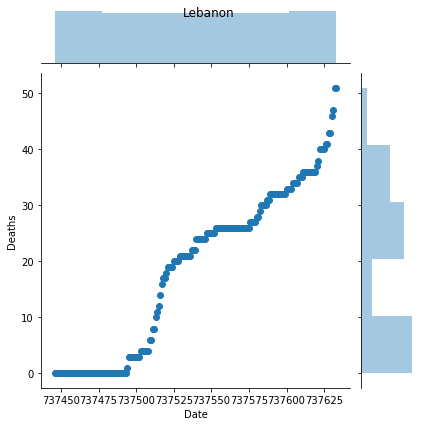

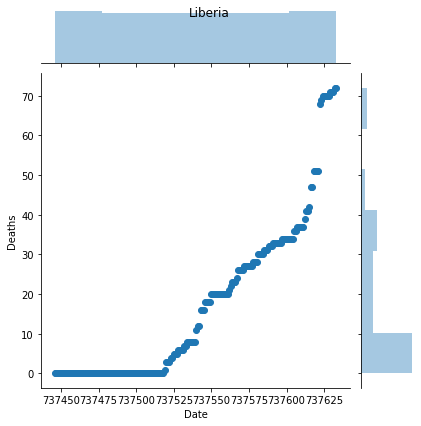

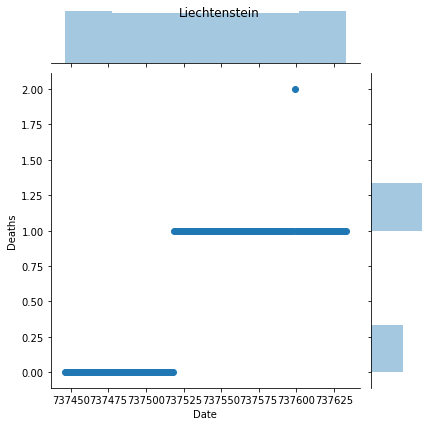

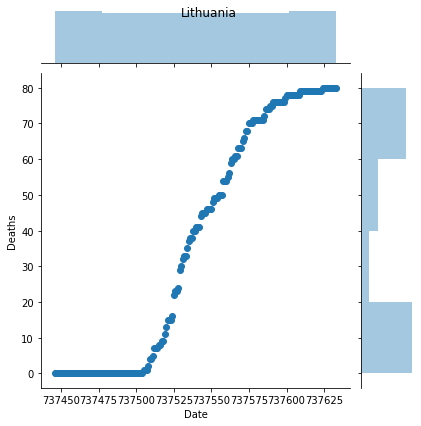

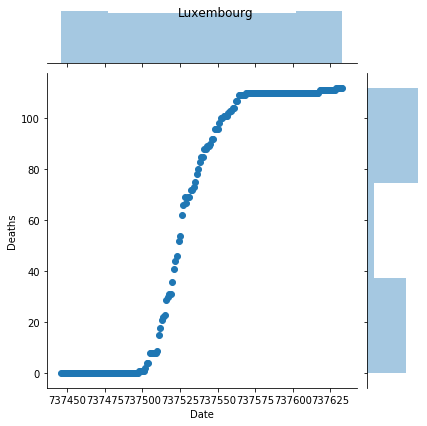

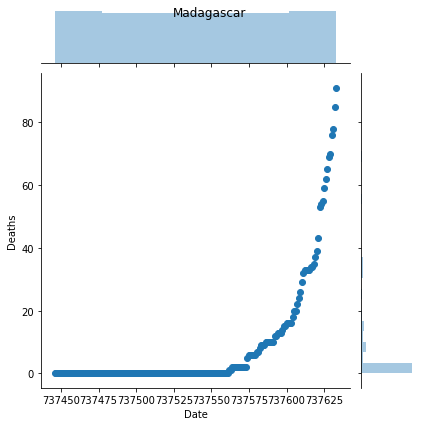

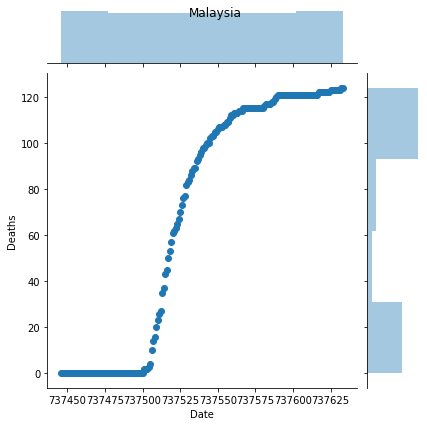

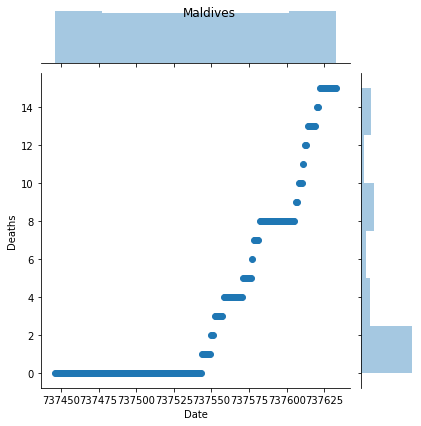

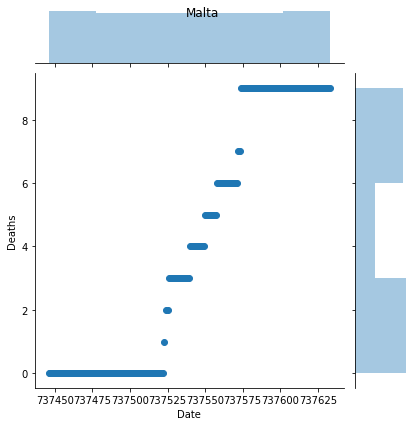

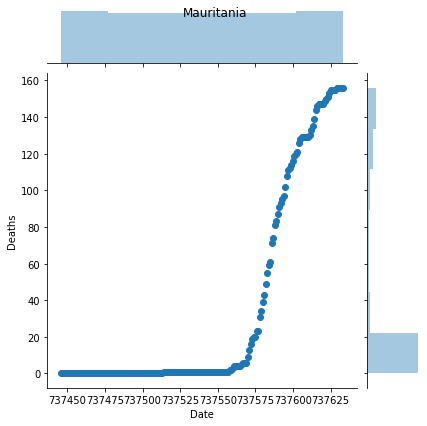

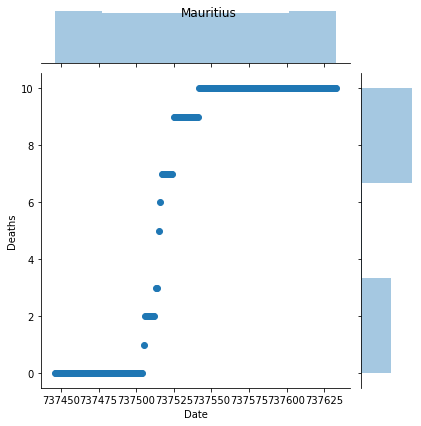

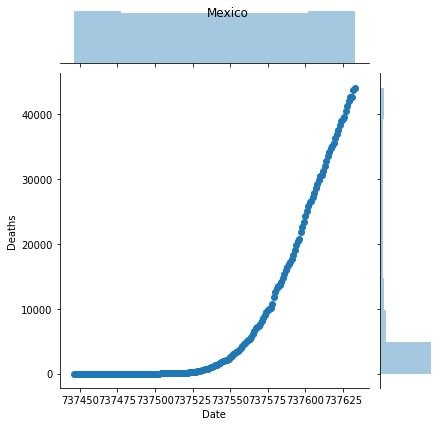

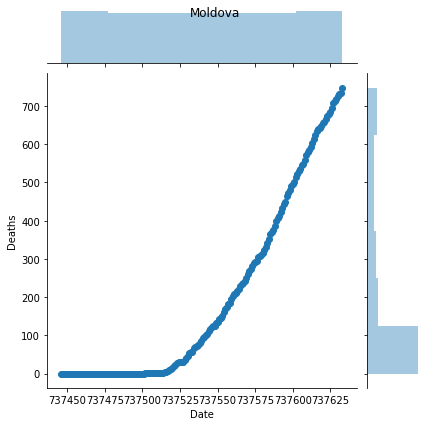

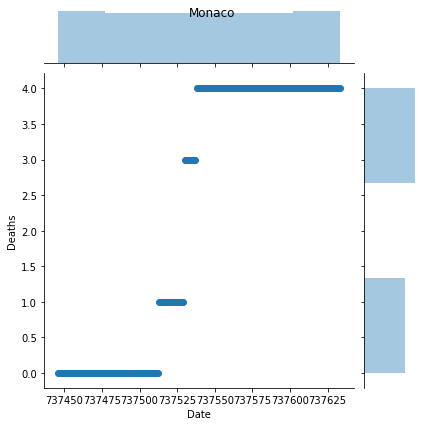

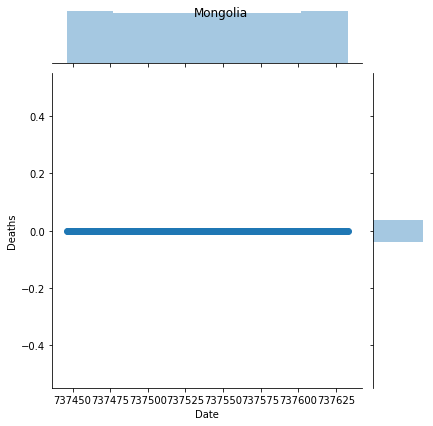

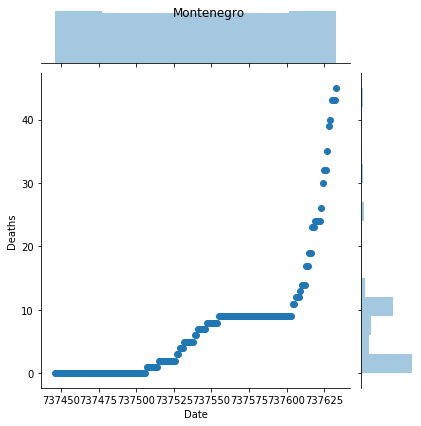

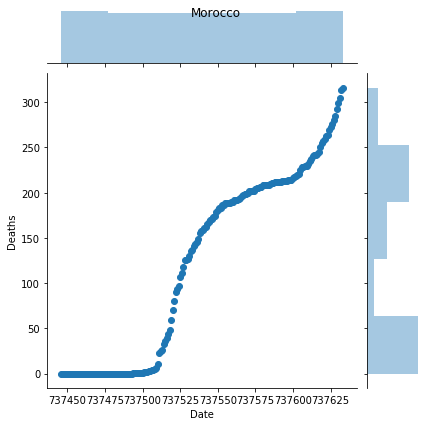

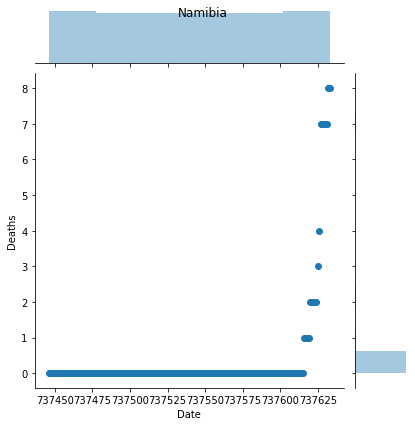

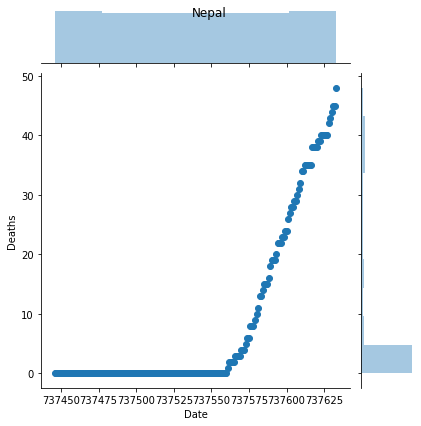

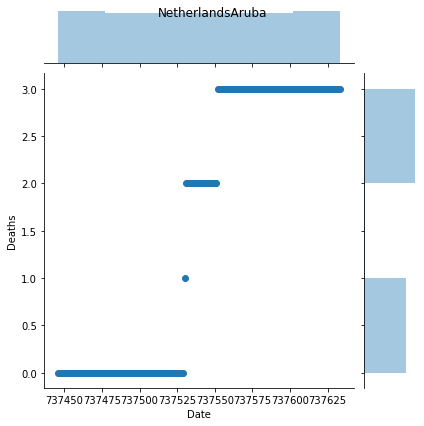

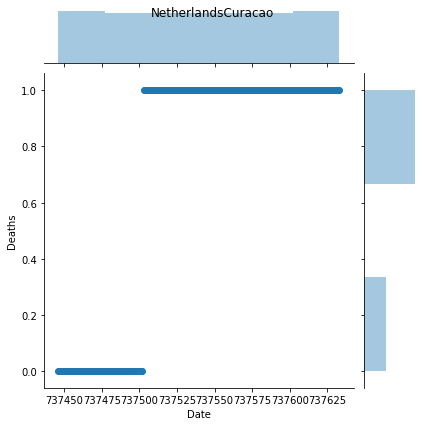

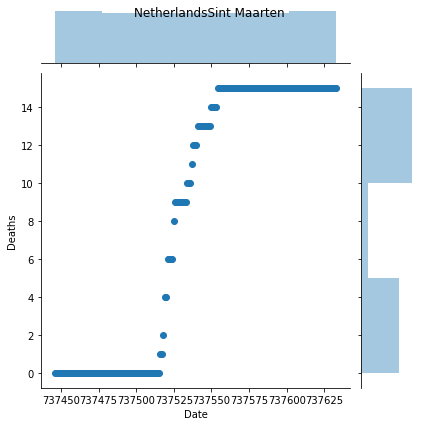

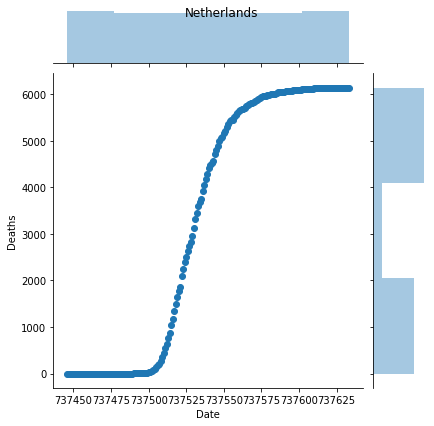

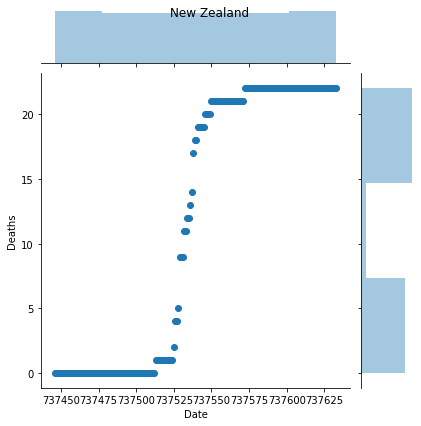

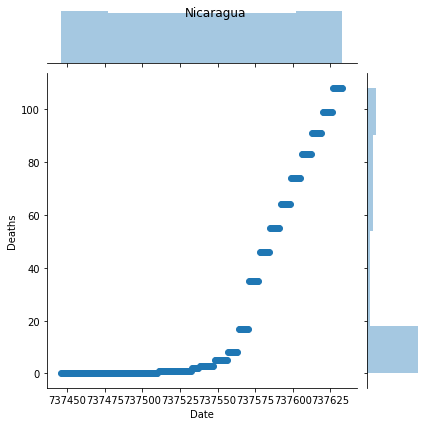

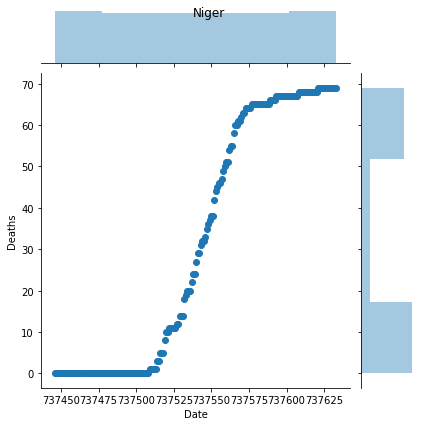

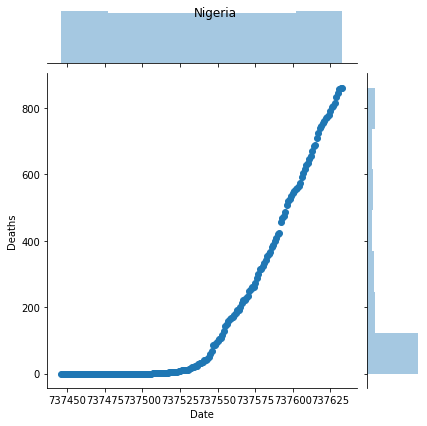

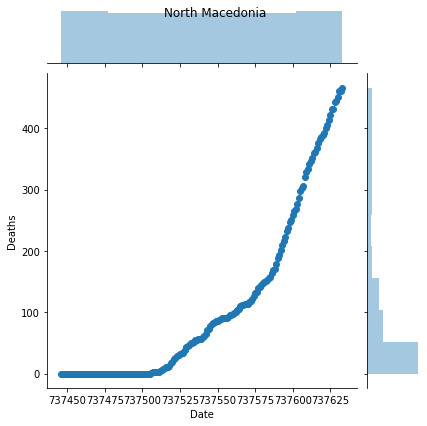

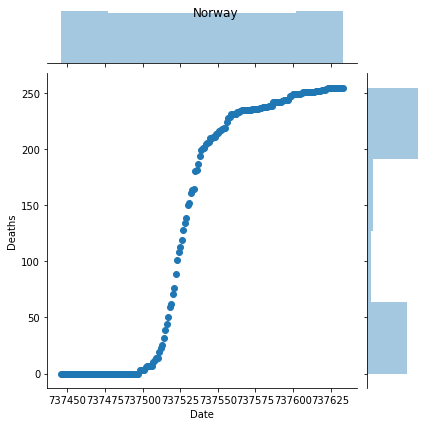

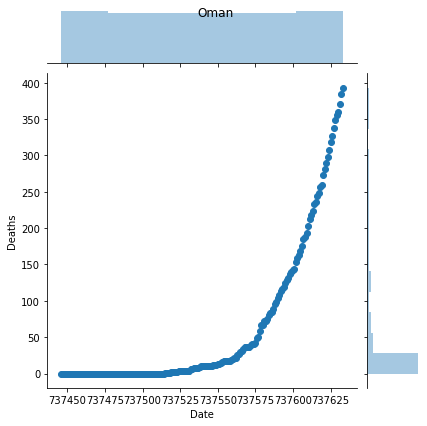

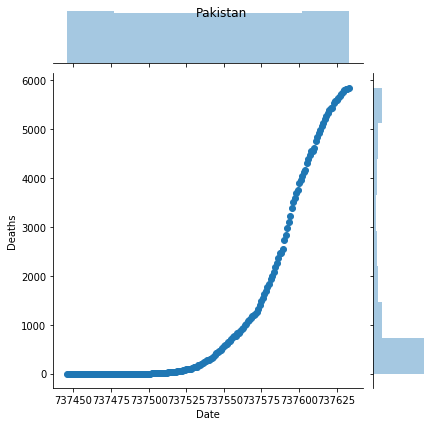

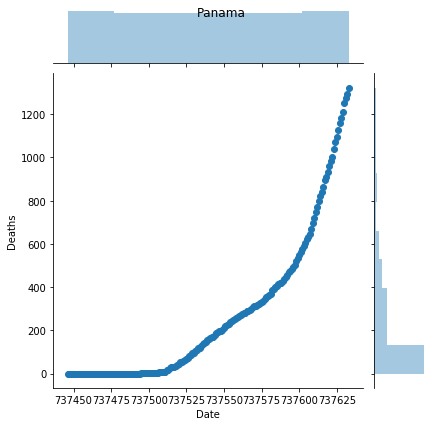

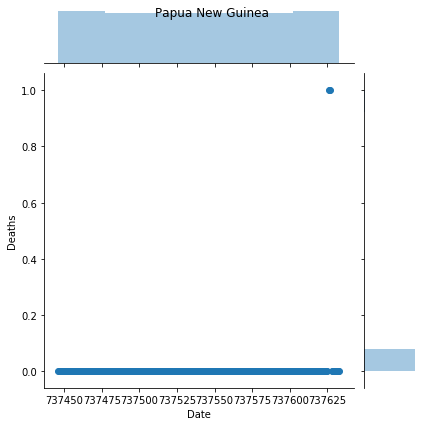

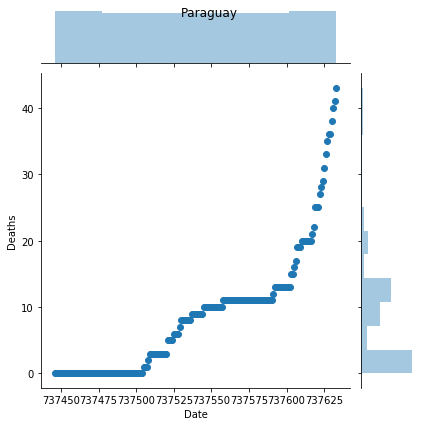

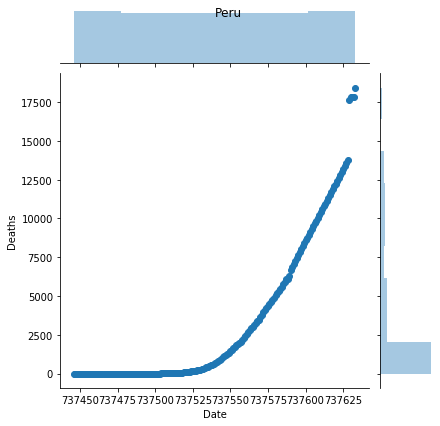

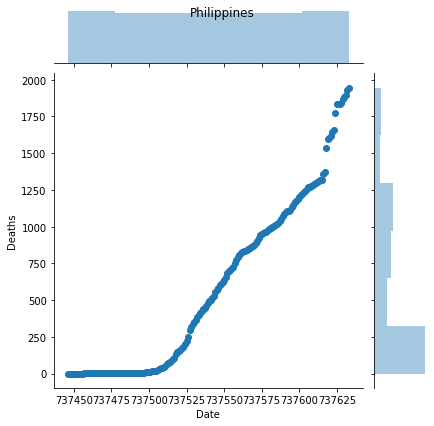

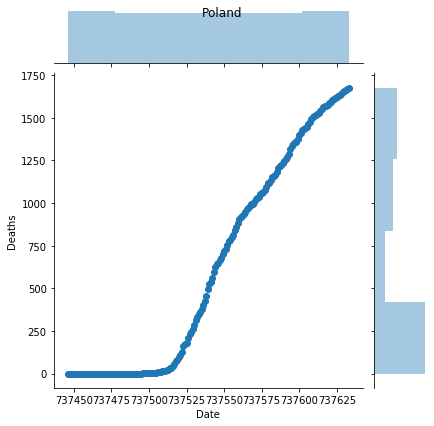

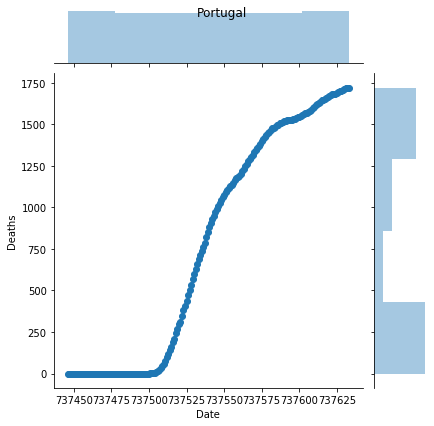

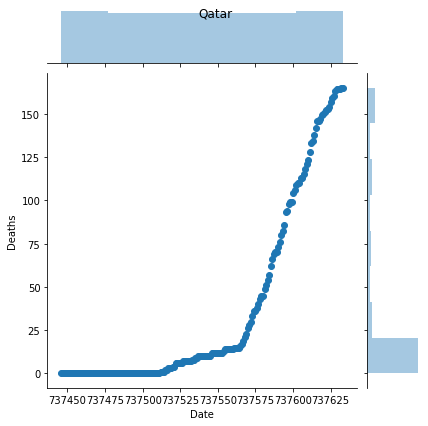

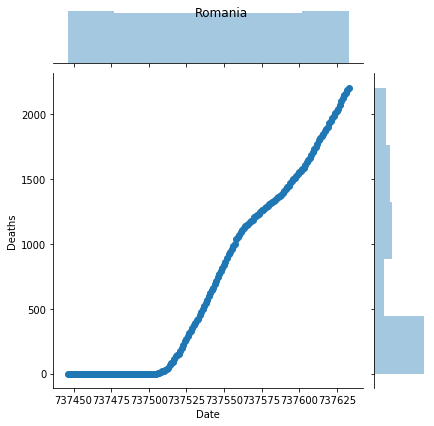

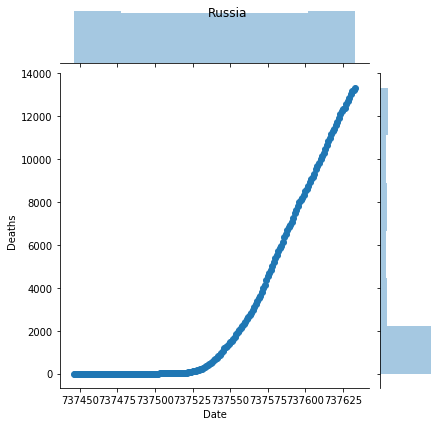

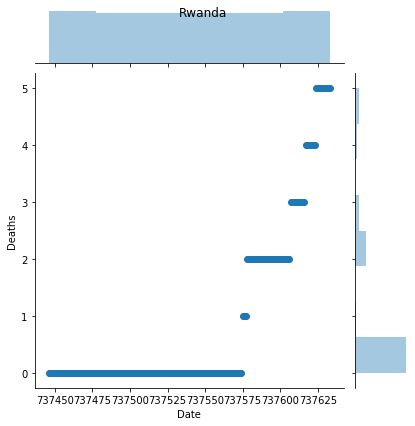

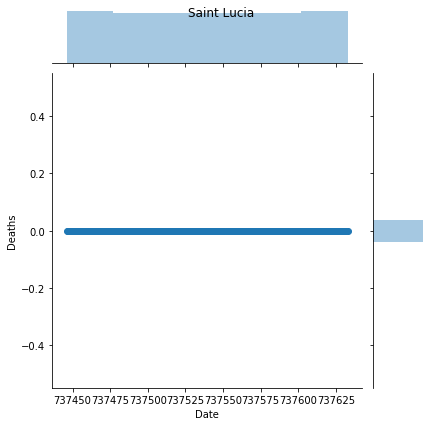

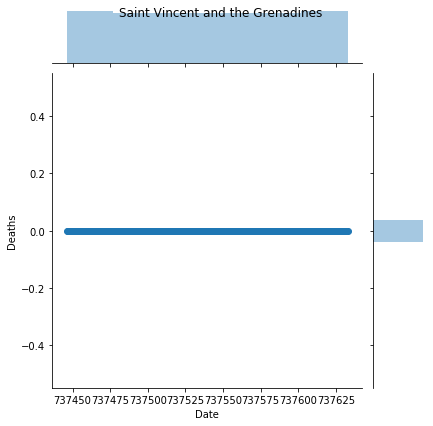

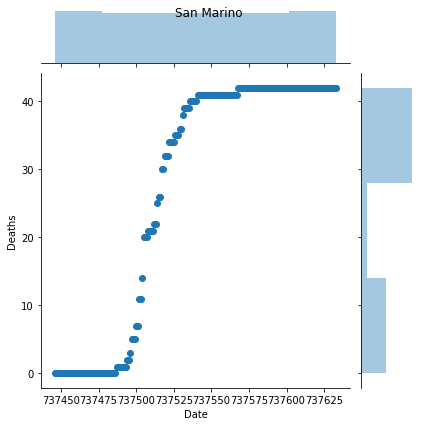

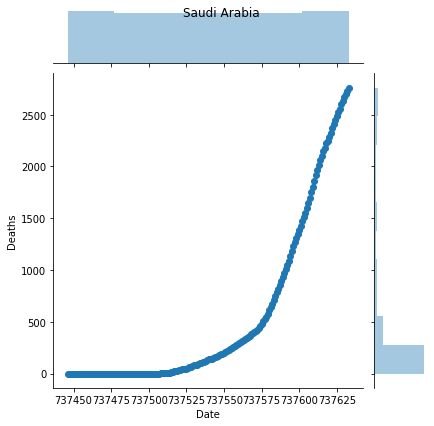

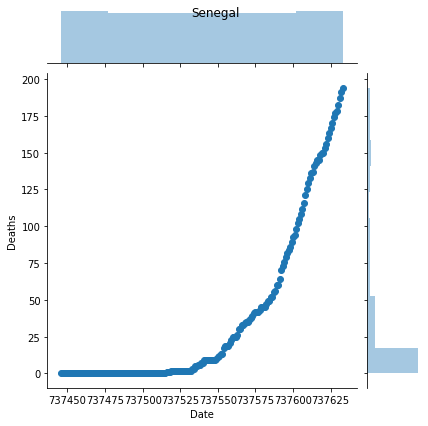

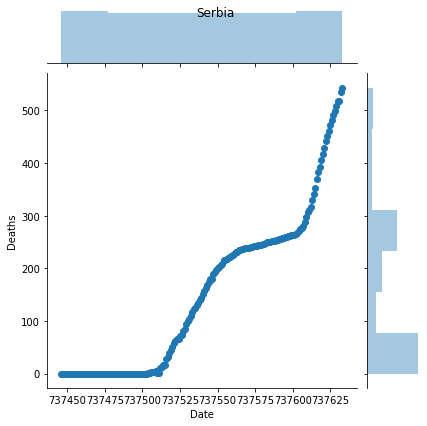

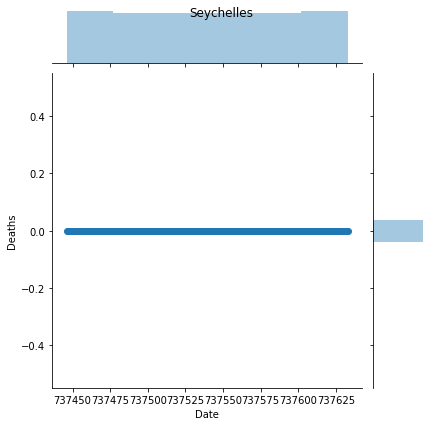

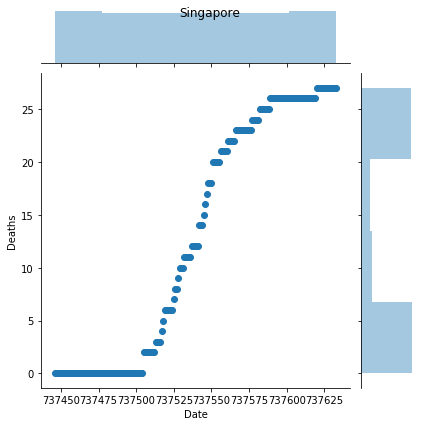

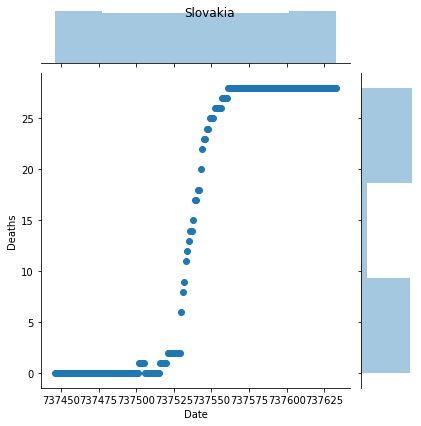

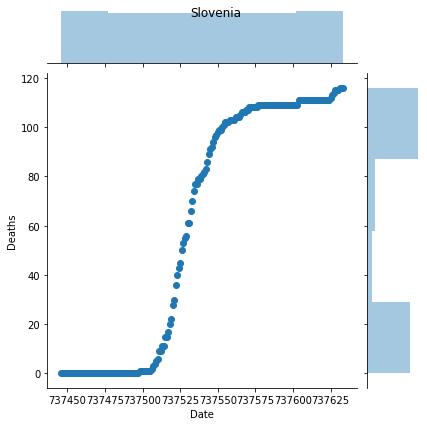

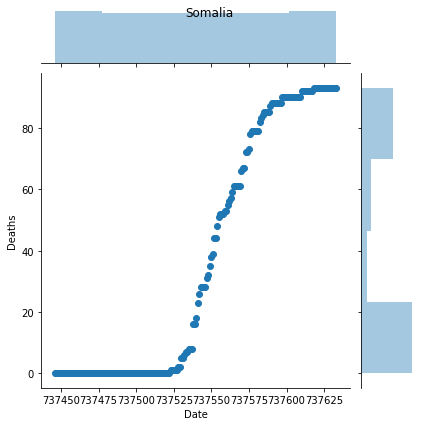

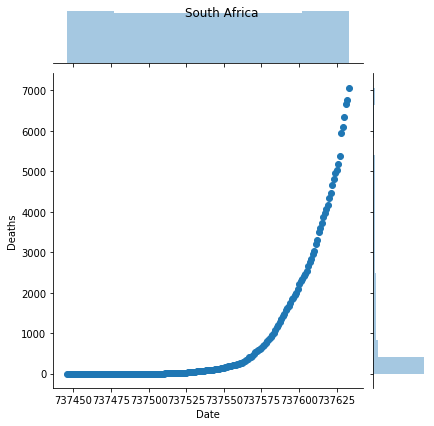

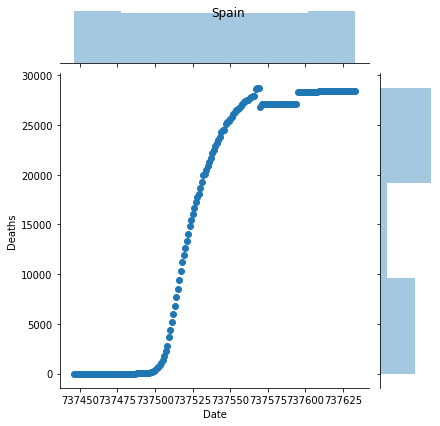

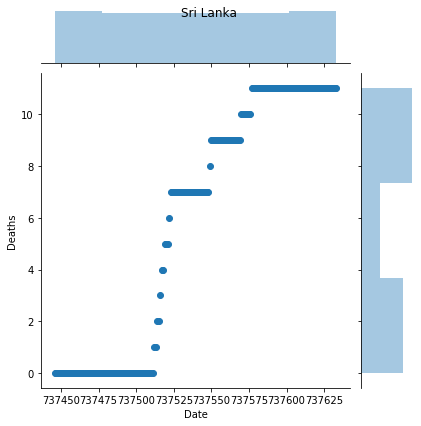

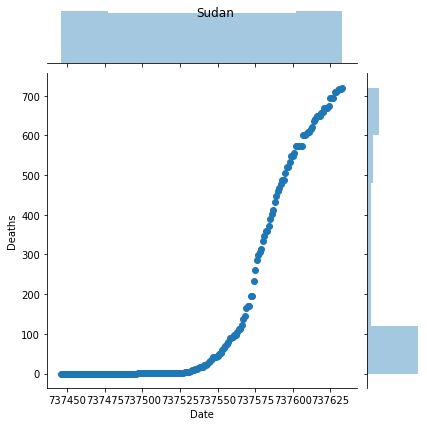

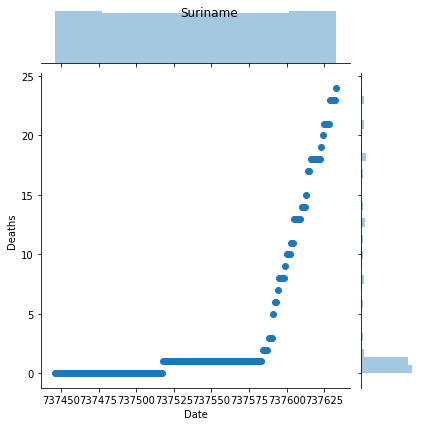

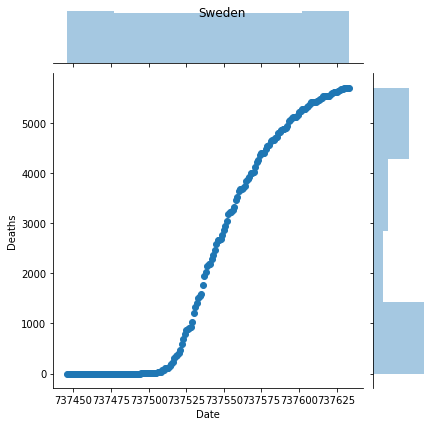

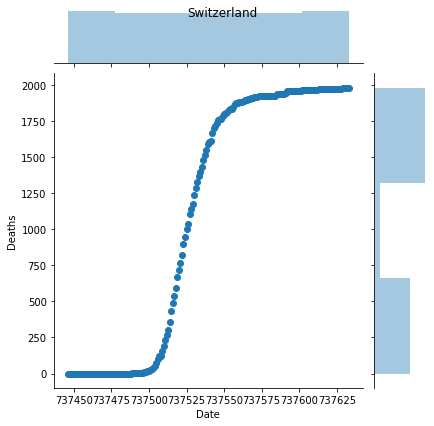

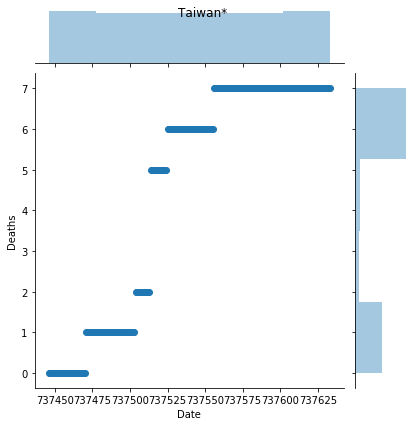

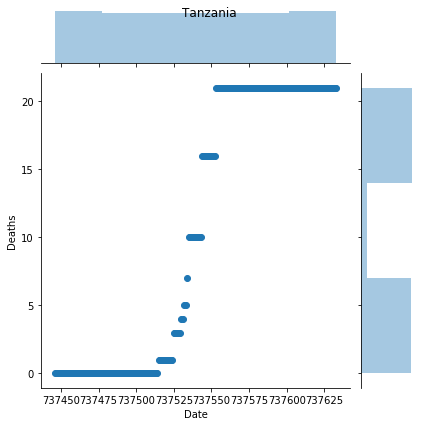

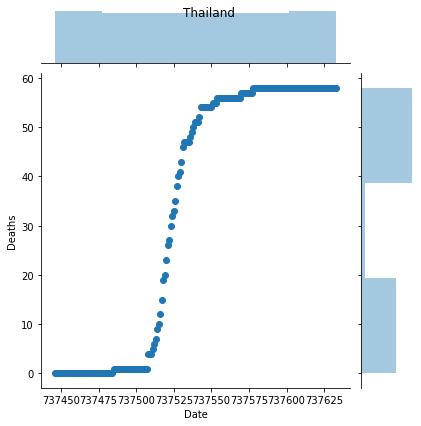

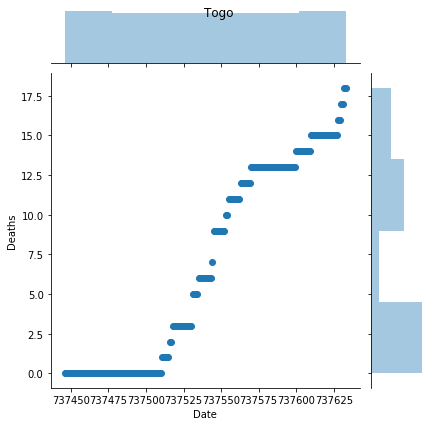

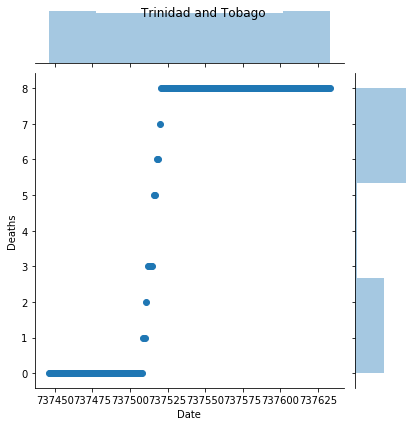

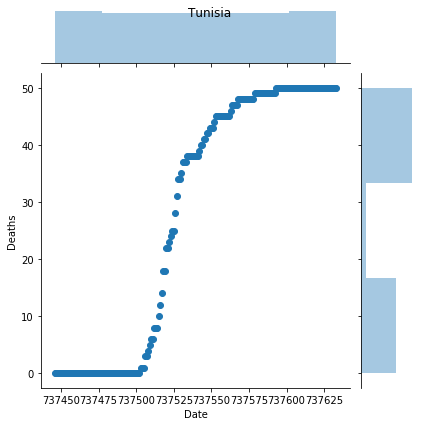

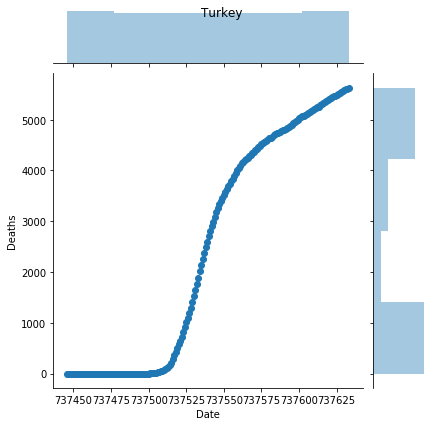

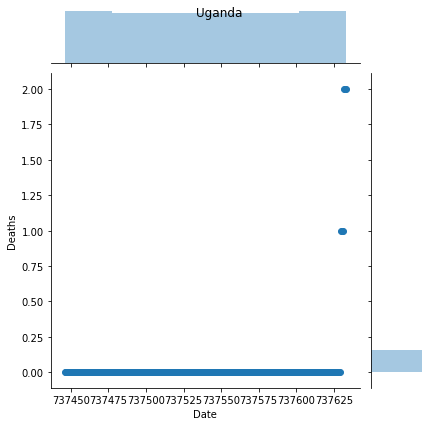

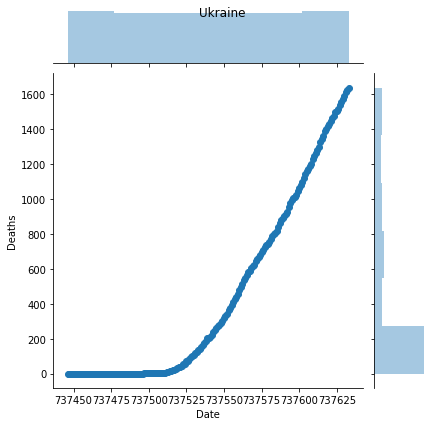

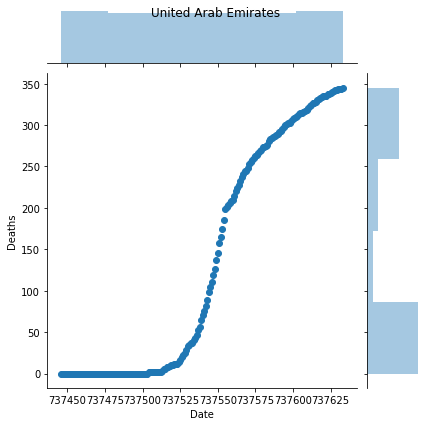

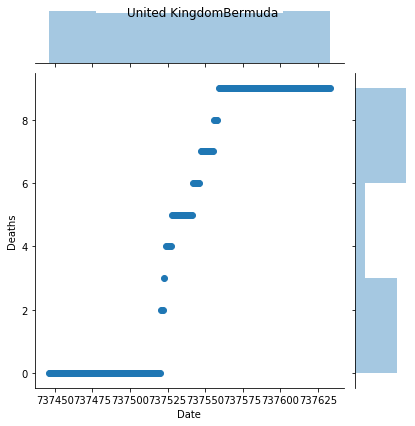

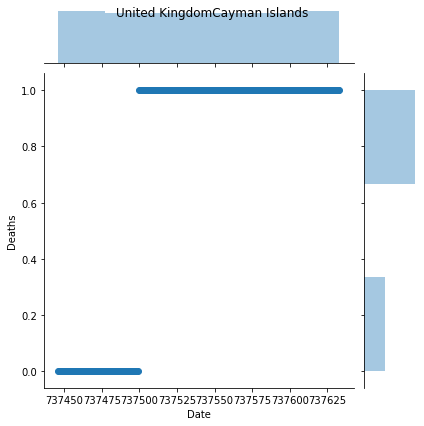

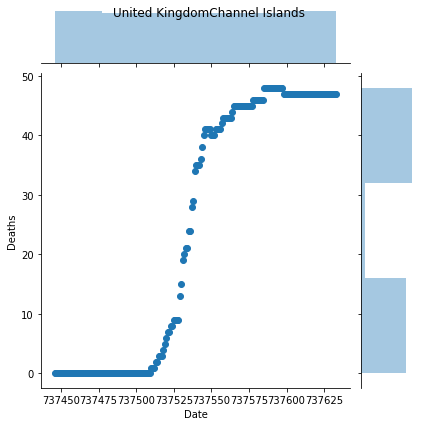

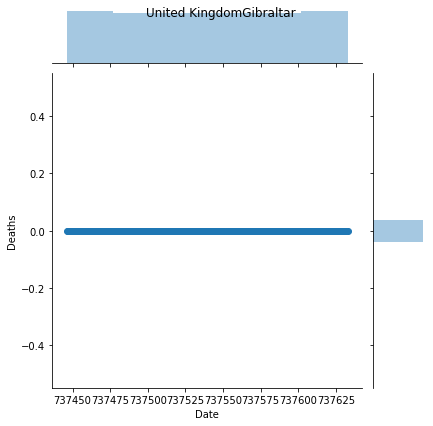

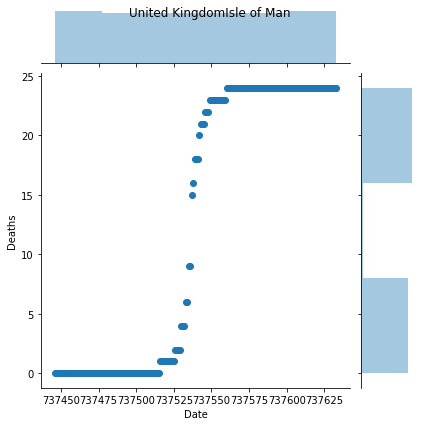

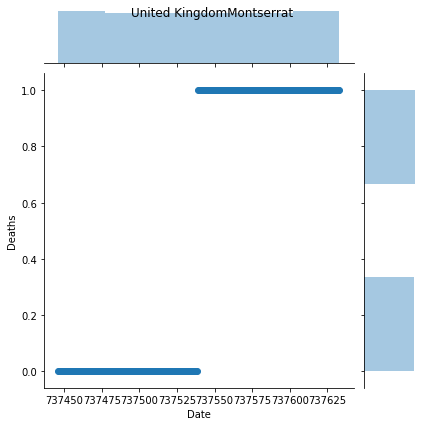

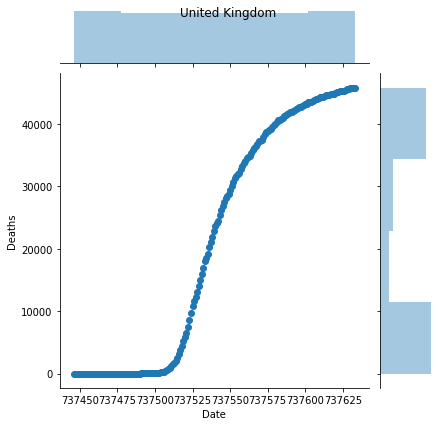

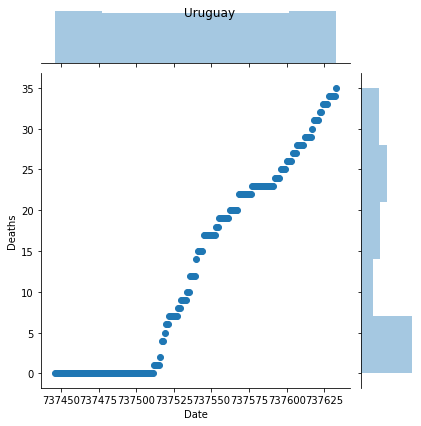

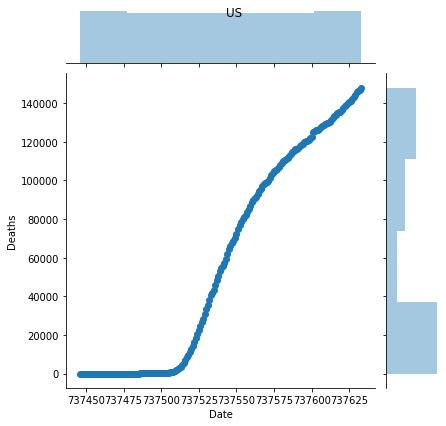

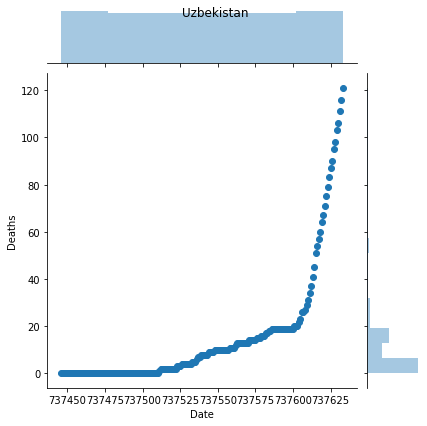

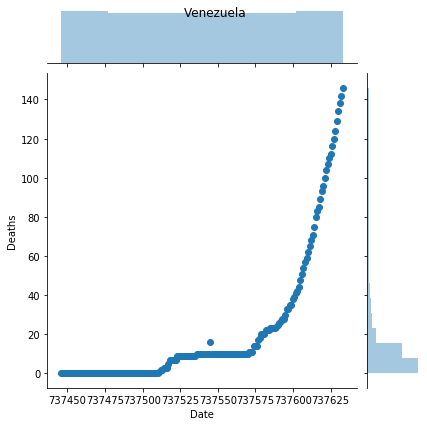

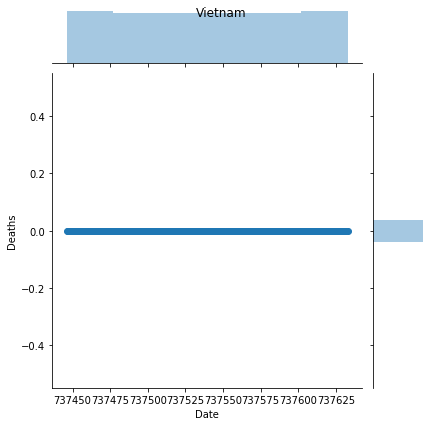

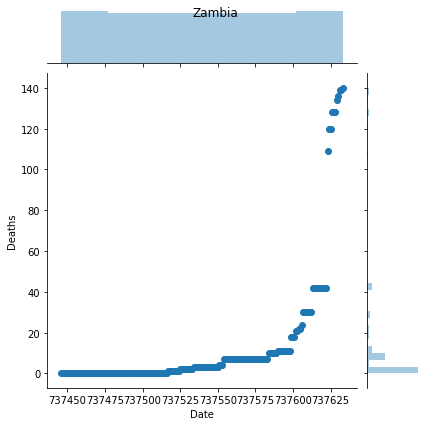

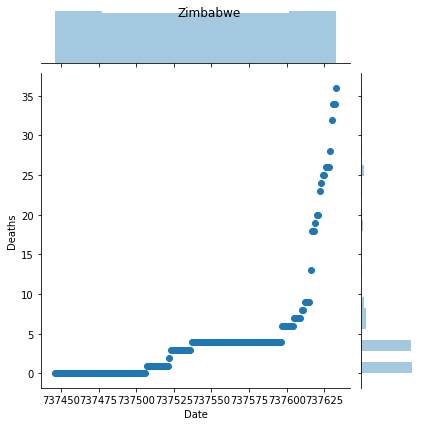

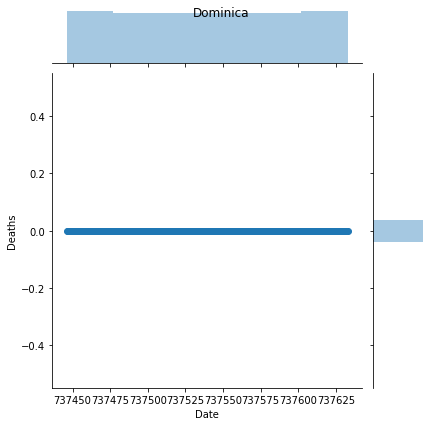

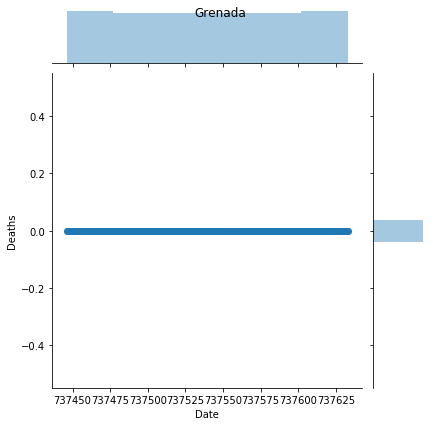

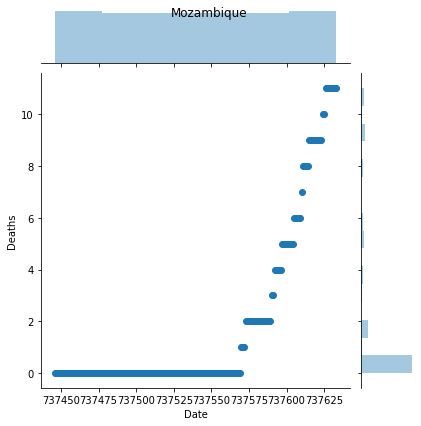

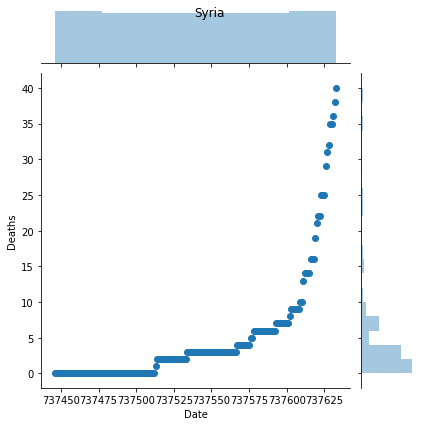

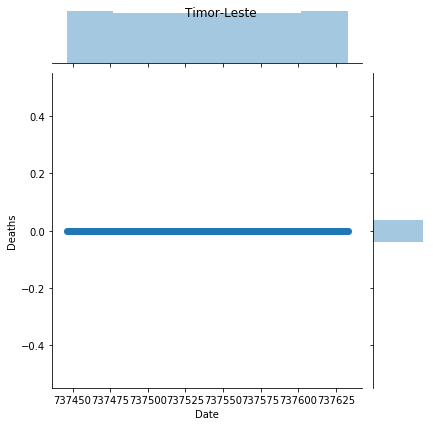

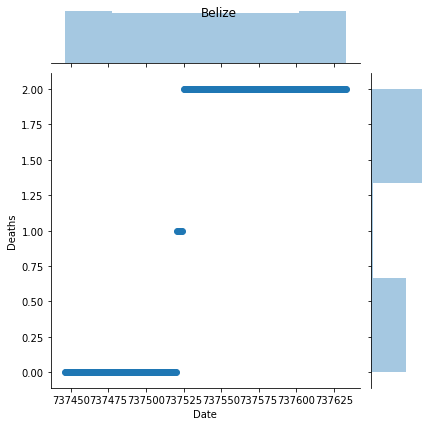

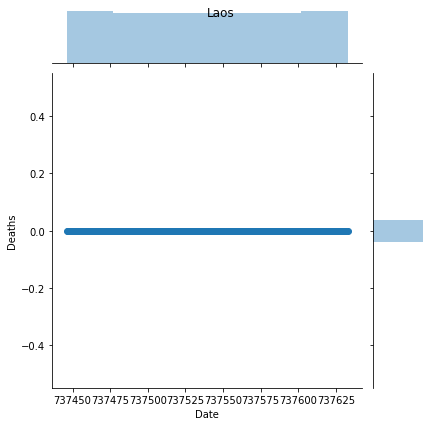

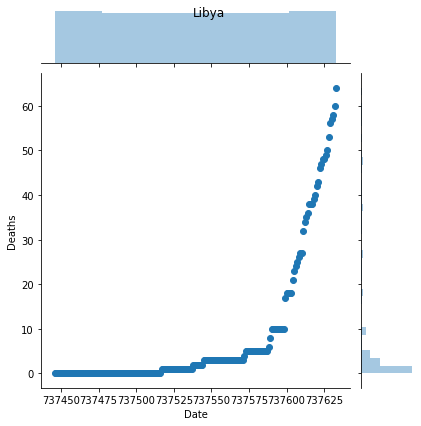

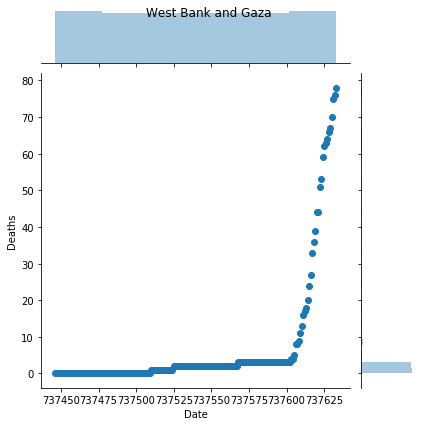

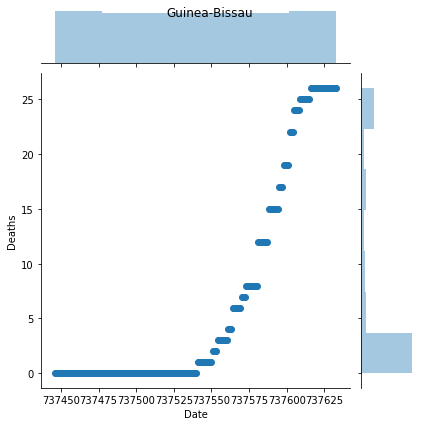

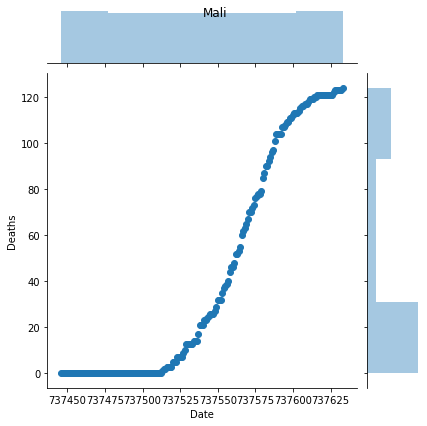

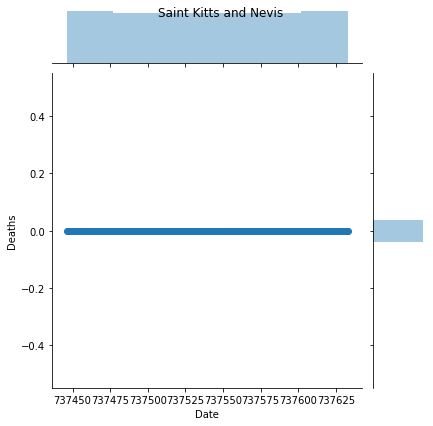

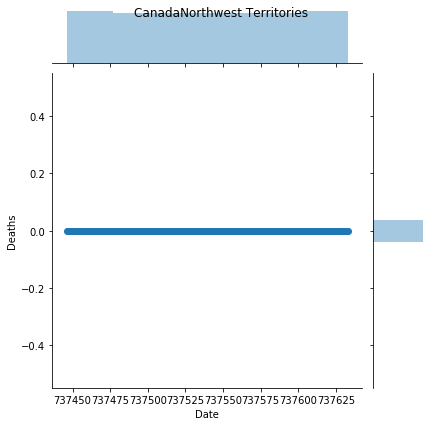

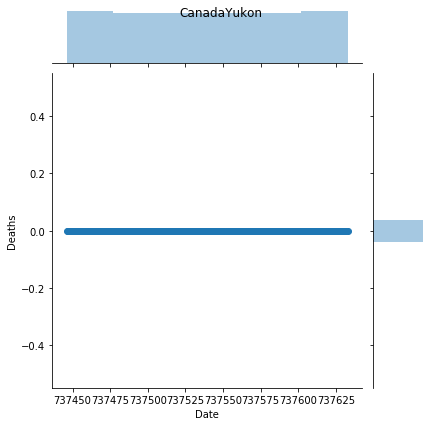

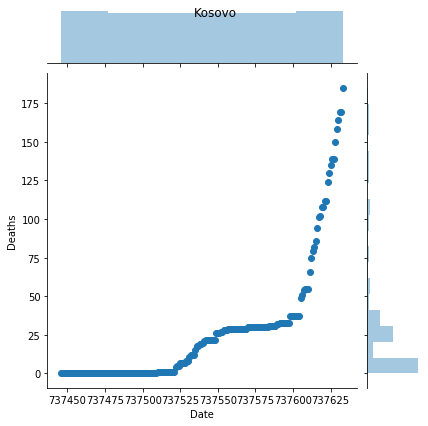

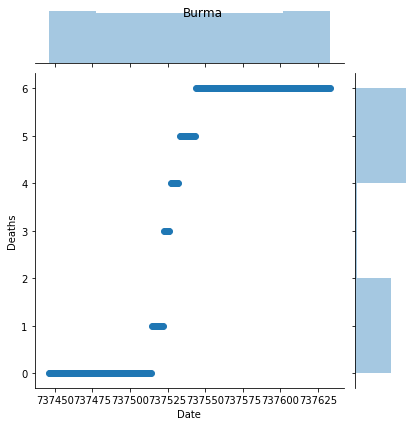

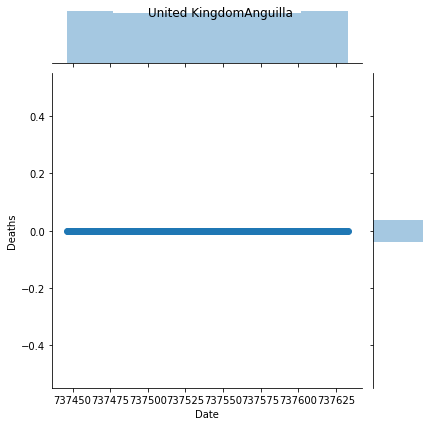

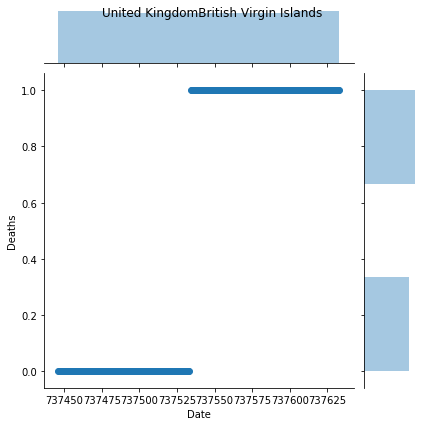

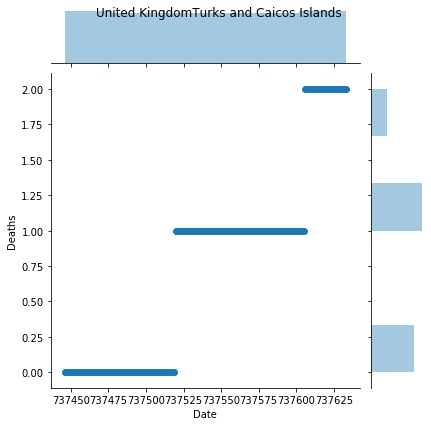

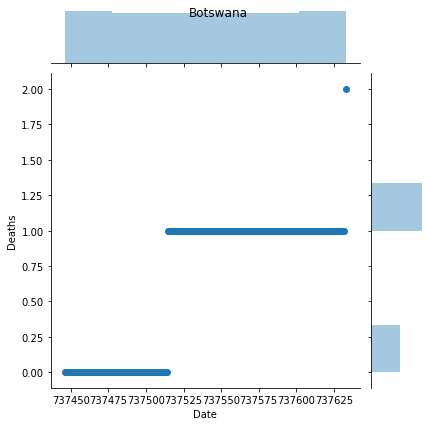

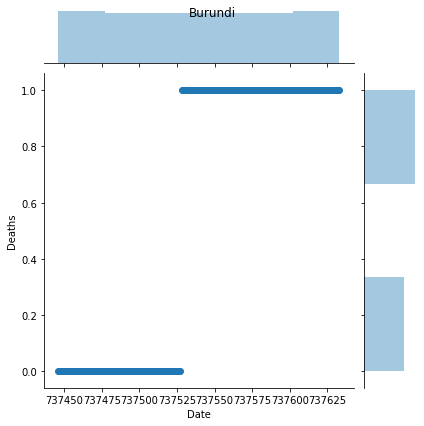

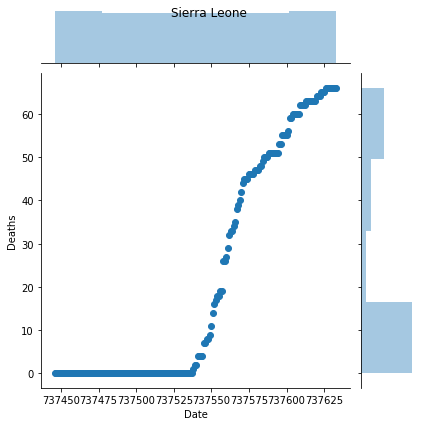

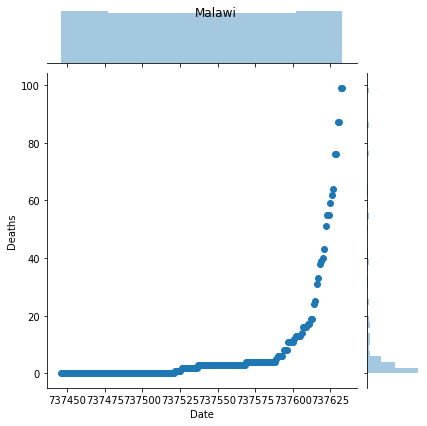

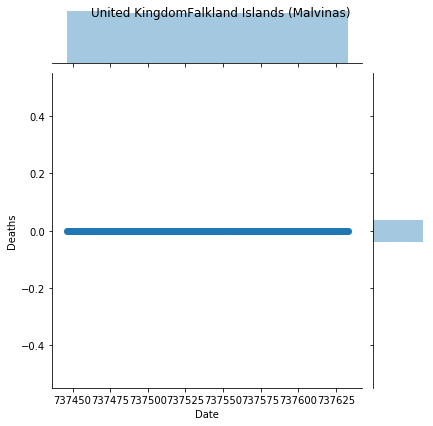

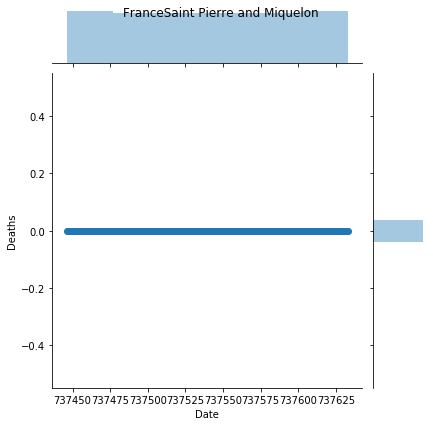

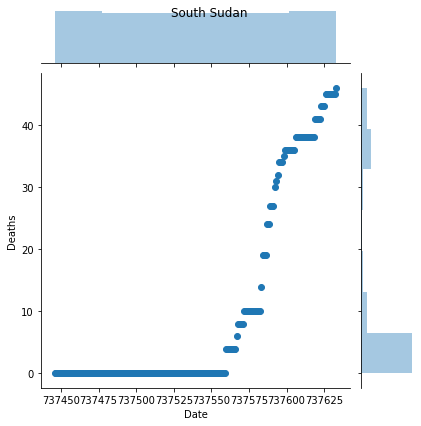

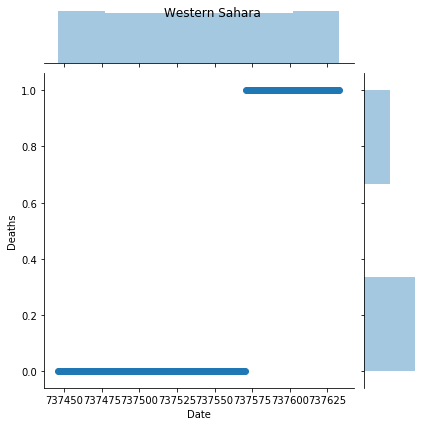

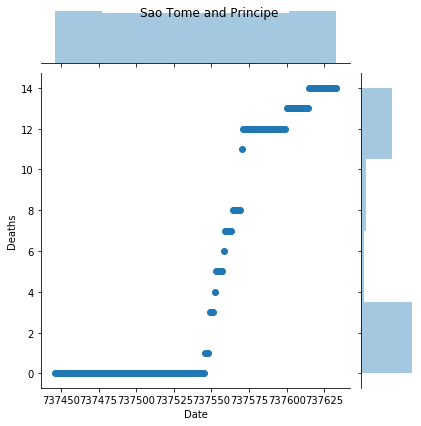

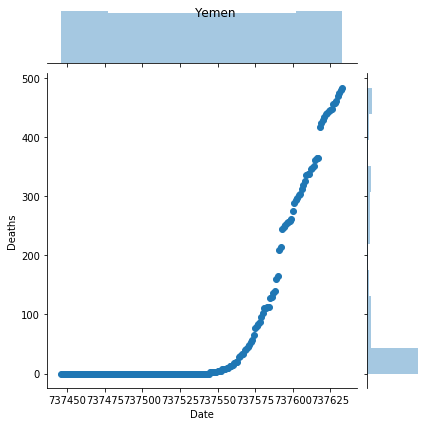

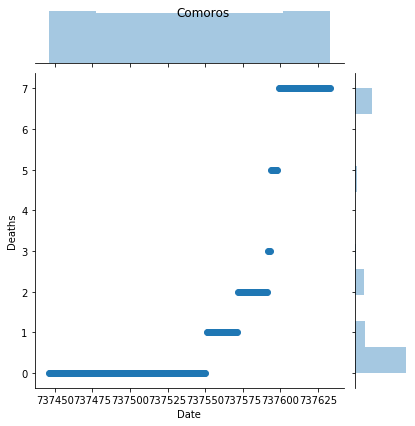

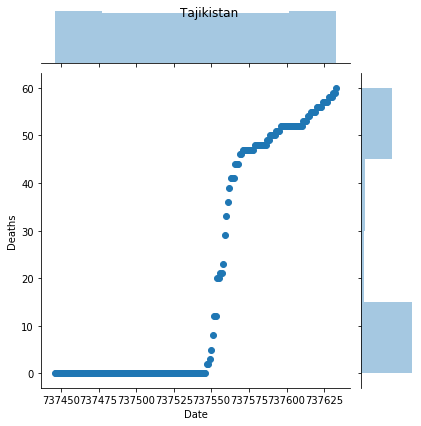

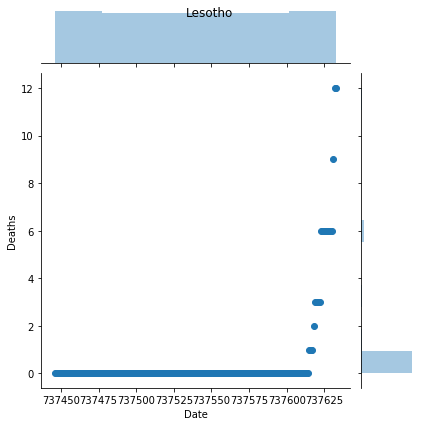

In [19]:
for c in data['Country/Region'].unique():
    p = pd.DataFrame(data={})
    p.insert(0, 'Date', np.zeros(len(data), dtype=int)) 
    p.insert(0, 'Confirmed', np.zeros(len(data), dtype=int)) 
    p.insert(0, 'Deaths', np.zeros(len(data), dtype=int)) 
    p.insert(0, 'Recovered', np.zeros(len(data), dtype=int)) 
    p.insert(0, 'Active', np.zeros(len(data), dtype=int)) 
    
    p['Date'] = data.loc[data['Country/Region']==c, 'Date']
    p['Deaths'] = data.loc[data['Country/Region']==c, 'Deaths']
    a = sns.jointplot(x='Date', y='Deaths', data=p)
    #plt.figure(figsize = (10, 6))
    a.fig.suptitle(c)
    
    plt.show()

In [14]:
# Make a copy of data
train_data = data.copy()
# Change data types of columns
for c in ['Country/Region']:
    train_data[c] = train_data[c].astype('category')
    train_data[c] = train_data[c].cat.codes

In [15]:
# Compare Actual and Encoded labels
for c in ['Country/Region']:
    print('column:', c)
    print(data[c].unique().tolist())
    print(train_data[c].unique().tolist(), '\n')

column: Country/Region
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'AustraliaAustralian Capital Territory', 'AustraliaNew South Wales', 'AustraliaNorthern Territory', 'AustraliaQueensland', 'AustraliaSouth Australia', 'AustraliaTasmania', 'AustraliaVictoria', 'AustraliaWestern Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'CanadaAlberta', 'CanadaBritish Columbia', 'CanadaManitoba', 'CanadaNew Brunswick', 'CanadaNewfoundland and Labrador', 'CanadaNova Scotia', 'CanadaOntario', 'CanadaPrince Edward Island', 'CanadaQuebec', 'CanadaSaskatchewan', 'Central African Republic', 'Chad', 'Chile', 'ChinaAnhui', 'ChinaBeijing', 'ChinaChongqing', 'ChinaFujian', 'ChinaGansu', 'ChinaGuangdong', 'ChinaGuangxi', 'ChinaGuizhou', 'ChinaHainan',

In [16]:
train_data.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,0,33.93911,67.709953,737446,0,0,0,0
1,1,41.15330,20.168300,737446,0,0,0,0
2,2,28.03390,1.659600,737446,0,0,0,0
3,3,42.50630,1.521800,737446,0,0,0,0
4,4,-11.20270,17.873900,737446,0,0,0,0


In [17]:

from sklearn.preprocessing import StandardScaler

cat_data = ['Country/Region', 'Date', 'Lat', 'Long']

columns = [c for c in train_data.columns if c not in cat_data]
scaler = StandardScaler()
scaler.fit(train_data[columns])
train_data[columns] = scaler.transform(train_data[columns])

In [18]:


from sklearn.model_selection import train_test_split
y = train_data['Deaths']
X = train_data.drop(columns=['Deaths'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (39254, 7)
Validation Set Dimensions: (9814, 7)


# Random Forest

In [19]:
# Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
randomf = RandomForestRegressor(n_estimators=200)
randomf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [20]:
# Measure mean absolute error for training and validation sets
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, randomf.predict(X_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, randomf.predict(X_test)))

Mean Absolute Error for Training Set: 0.0009710255655706032
Mean Absolute Error for Test Set: 0.0021795232642966875


feature: Country/Region = 0.0036445700171043338
feature: Lat = 0.023512273275518625
feature: Long = 0.044087573972444075
feature: Date = 0.008412338213937815
feature: Confirmed = 0.33712526428417555
feature: Recovered = 0.0098674723762073
feature: Active = 0.5733505078606124


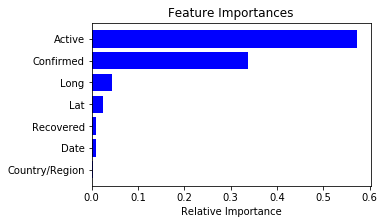

In [21]:
# important features for random forest regressor
for name, importance in zip(X.columns, randomf.feature_importances_):
    print('feature:', name, "=", importance)
importances = randomf.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.figure(figsize= (5, 3))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [5, 10, 12], 
          'max_features': [2, 4, 6], 
          'min_samples_leaf': [3, 4, 5], 
          'min_samples_split': [8, 10, 12],
          'n_estimators': [80, 140, 200]}
k = 4
score_param = 'neg_mean_absolute_error'
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator=rf, param_grid=params, scoring=score_param, n_jobs=3, cv=k, verbose=True)
rf_grid.fit(X_train, y_train)

Fitting 4 folds for each of 243 candidates, totalling 972 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   51.1s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  4.6min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed: 14.3min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed: 34.1min
[Parallel(n_jobs=3)]: Done 972 out of 972 | elapsed: 47.7min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [26]:
from sklearn.metrics import mean_absolute_error

best_model = rf_grid.best_estimator_

predict_train = best_model.predict(X_train)
predict_test = best_model.predict(X_test)

print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, predict_train))
print('Mean Absolute Error for Validation Set:', mean_absolute_error(y_test, predict_test))

Mean Absolute Error for Training Set: 0.003921799010990455
Mean Absolute Error for Validation Set: 0.005258982231888658


# Linear Regression

In [41]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, predict_train))
print('Mean Absolute Error for Validation Set:', mean_absolute_error(y_test, predict_test))

Mean Absolute Error for Training Set: 1.0353259404051003e-13
Mean Absolute Error for Validation Set: 1.0392759515665697e-13


# XGBoost

In [30]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train, verbose=False)

[20:46:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [31]:
predict_train = my_model.predict(X_train)
predict_test = my_model.predict(X_test)

print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, predict_train))
print('Mean Absolute Error for Validation Set:', mean_absolute_error(y_test, predict_test))

Mean Absolute Error for Training Set: 0.01948887674513162
Mean Absolute Error for Validation Set: 0.02164665854795116


In [39]:
parameters = {'nthread':[3], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
k = 4
score_param = 'neg_mean_absolute_error'
clf = GridSearchCV(estimator=my_model, param_grid=parameters, scoring=score_param, n_jobs=3, cv=k, verbose=True)
clf.fit(X_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  36 out of  36 | elapsed:  2.2min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=3,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estim

In [41]:
print('Model Score:', clf.best_score_)
print('Best premeters: ', clf.best_params_)

Model Score: -0.004795603496153653
Best premeters:  {'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 3, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


we see that XGBoost performed the best